# Matplotlib raport - Penguins
Maciej Śliwakowski

Źródła:
- McKinney W. (2018). *Python w analizie danych. Przetwarzanie danych za pomocą pakietów Pandas i NumPy oraz środowiska IPython.* Wydanie II. Helion
- Grus J. (2018). Data science od podstaw. Analiza danych w Pythonie. Helion
- dokumentacja matplotlib (https://matplotlib.org/3.3.0/index.html)
- dokumentacja seaborn (https://seaborn.pydata.org/)

Użyte biblioteki:

In [72]:
# Matplotlib, seaborn, pandas, numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Podstawy

<div style="text-align: justify"> <b>Matplotlib</b> jest jedną z najpopularniejszych bibliotek języka Python, służącą do wizualizacji danych. Biblioteka napisana jest w Python, ale korzysta również z numerycznego roszerzenia tego języka programowania, a więc pakietu NumPy. </div>
<br></br>
<div style="text-align: justify"> Podstawowymi zaletami Matplotlib są: łatwość przy tworzeniu podstawowych, mało rozbudowanych wykresów (podejście funkcyjne) oraz, w późniejszym etapie, możliwość konfigurowania oraz kontroli każdego elementu wizualizacji (podejście obiektowe). </div>

## 1. Podejście funkcyjne - tworzenie podstawowego wykresu

<br></br>
<div style="text-align: justify"> Do rysowania podstawowego wykresu, poprzez podanie danych do naniesienia, używa się funkcji <b>matplotlib.pyplot.plot</b>. Jest to główna funkcja pakietu, która przyjmuje jako argumenty tablicę współrzędnych (x i y) oraz opcjonalnie łańcuch znaków definiujący kolor i styl linii - można dokonać tego również za pomocą bardziej oczywistej notacji, poprzez osobną edycję stylu linii (linestyle) oraz koloru linii (color). </div>

Konfiguracji podstawowych elementów wykresów można dokonać poprzez użycie:
- matplotlib.pyplot.figure - edycja właściwości wykresów (np. rozmiarów wykresu)
- matplotlib.pyplot.xlabel - etykieta osi X
- matplotlib.pyplot.ylabel - etykieta osi Y
- matplotlib.pyplot.title - tytuł wykresu
- matplotlib.pyplot.xticks - edycja znaczników osi X
- matplotlib.pyplot.yticks - edycja znaczników osi Y
- matplotlib.pyplot.legend - naniesienie i edycja legendy
- matplotlib.pyplot.xlim - ustalenie przedziału wartości osi X
- matplotlib.pyplot.ylim - ustalenie przedziału wartości osi Y
- matplotlib.pyplot.margins - dostosowanie marginesów wykresu

Do wyświetlenia wykresu służy funkcja **matplotlib.pyplot.show**.

W poniższym przykładzie poddałem wizualizacji funkcję sinusa w przedziale <0, 2π>. 

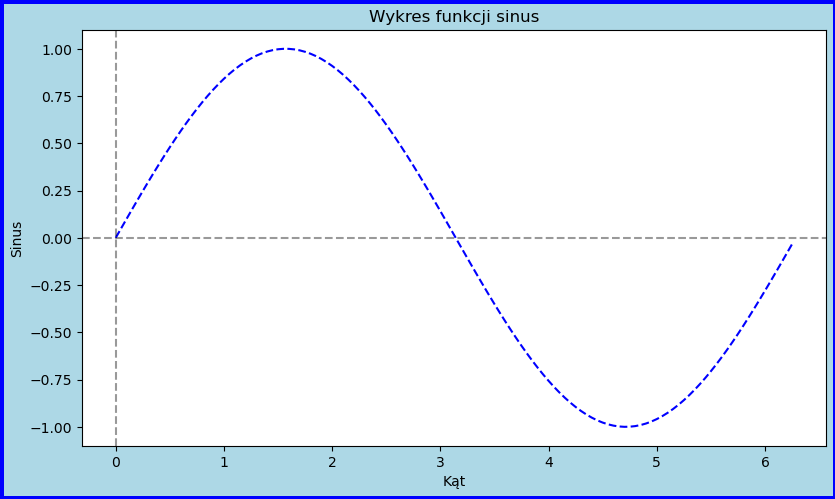

In [73]:
# Przygotowanie danych dla osi
x = np.arange(0, np.pi *2, 0.05)
y = np.sin(x)

# Ustawienie wielkości wykresu oraz innych jego właściwości
plt.figure(figsize=(16*.6, 9*.6),
           facecolor='lightblue',
           edgecolor='blue',
           linewidth=5)
# dpi - rozdzielczość wykresu
# facecolor, edgecolor - kolor tła, kolor obramowania wykresu
# linewidth - szerokość obramowania

plt.plot(x, y, 'b--')
#lub: plt.plot(x, y, linestyle="--", color="Blue")
plt.xlabel('Kąt')
plt.ylabel('Sinus')
plt.title('Wykres funkcji sinus')
# DODANIE POZIOMEJ (dla y=0) I PIONOWEJ (dla x=0) LINII:
plt.axhline(y=0, linestyle='--', color='black', alpha=0.4)
plt.axvline(x=0, linestyle='--', color='black', alpha=0.4)

plt.show()

<div style="text-align: justify">Jeżeli chcemy na jednym wykresie zwizualizować więcej serii danych o wspólnej osi, wystarczy użyć funkcji matplotlib.pyplot.plot(), by nanieść dane. Do rozróżnienia danych stosuje się legendę - metoda <b>matplotlib.pyplot.legend</b>.</div>

Dodanie siatki do wykresu następuje przy użyciu metody **matplotlib.pyplot.grid**. 

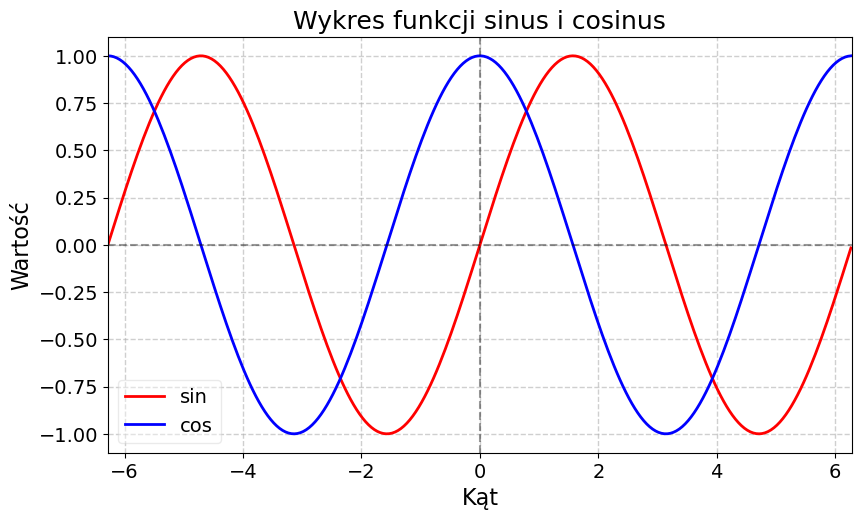

In [74]:
# Przygotowanie danych dla osi
x = np.arange(-2*np.pi, 2*np.pi, 0.05)
y = np.sin(x)
z = np.cos(x)


plt.figure(figsize=(16*.6, 9*.6))

# NANIESIENIE PIERWSZEJ SERII DANYCH:
plt.plot(x, y, linestyle='-', linewidth=2, color='r')
# NANIESIENIE DRUGIEJ SERII DANYCH:
plt.plot(x, z, linestyle='-', linewidth=2, color='b')

plt.title('Wykres funkcji sinus i cosinus', fontsize=18)
plt.xlabel('Kąt', fontsize=16)
plt.ylabel('Wartość', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(y=0, linestyle='--', color='black', alpha=0.4)
plt.axvline(x=0, linestyle='--', color='black', alpha=0.4)

# DODANIE LEGENDY:
plt.legend(['sin', 'cos'], 
           loc='lower left', 
           fontsize=14, 
           framealpha=0.4)
# loc - rozmieszczenie legendy
# fontsize - rozmiar czcionki
# framealpha - przeźroczystość ramki legendy

# DODANIE SIATKI:
plt.grid(linestyle='--', 
         alpha=0.6, 
         linewidth=1, 
         fillstyle='left')

# USTALENIE LIMITU WARTOŚCI OSI X
plt.xlim(-2*np.pi, 2*np.pi)

plt.show()

<div style="text-align: justify">Możliwe jest oczywiście umieszczenie powyższych danych na dwóch osobnych podwykresach (subplots), dzięki metodzie <b>matplotlib.pyplot.subplot</b>, podając liczbę wykresów w wierszach, liczbę wykresów w kolumnach, a także precyzując, gdzie ma być umieszczony konkretny wykres.</div>
<br></br>
<div style="text-align: justify">Położenie wykresów względem siebie można regulować używając metody <b>matplotlib.pyplot.subplots_adjust</b>. Parametry <i>left, right, bottom, top</i> odpowiadają za dostosowanie granic przestrzeni wykresów, natomiast <i>hspace, wspace</i> za odpowiednio szerokość i wysokość odstępu między przestrzeniami wykresów.</div>

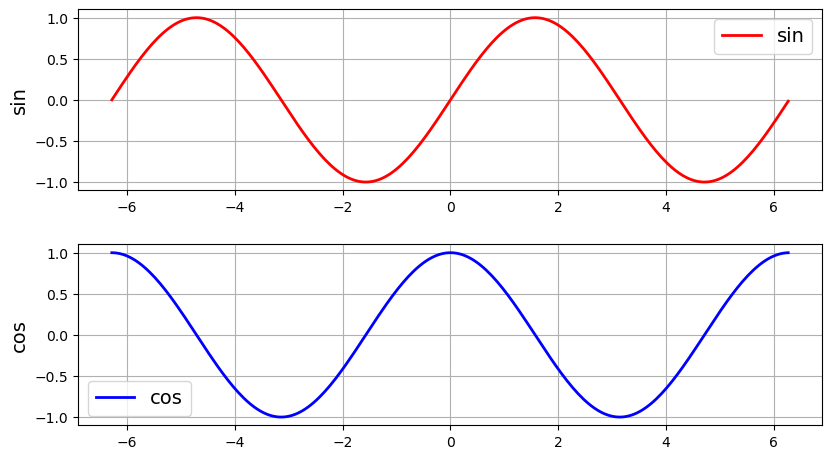

In [75]:
x = np.arange(-2*np.pi, 2*np.pi, 0.05)
y = np.sin(x)
z = np.cos(x)

plt.figure(figsize=(16*.6, 9*.6))
# Dodanie podwykresu(dwa wiersze, jedna kolumna, pierwszy wykres)
plt.subplot(2, 1, 1)
plt.plot(x, y, linestyle='-', linewidth=2, color='r')
plt.ylabel('sin', fontsize=14)
plt.grid()
plt.legend(['sin'], fontsize=14)

# Dodanie podwykresu(dwa wiersze, jedna kolumna, drugi wykres)
plt.subplot(2, 1, 2)
plt.plot(x, z, linestyle='-', linewidth=2, color='b')
plt.ylabel('cos', fontsize=14)
plt.grid()
plt.legend(['cos'], fontsize=14)

plt.subplots_adjust(hspace=.3)

plt.show()

## 2. Podejście obiektowe

### Klasa płótna (Figure Class)

<br></br>
<div style="text-align: justify">Wizualizacje tworzone przy użyciu pakietu matplotlib są umieszczane w obiektach typu <b>Figure</b>. Są to "pojemniki" (można je nazwać także "płótnami") na pozostałe elementy wizualizacji. Tworzenie płótna odbywa się za pomocą funkcji <b>matplotlib.pyplot.figure</b>.</div>
<br></br>
<div style="text-align: justify">Podejście obiektowe do tworzenia wizualizacji przy użyciu matplotlib polega na pojmowaniu przestrzeni wizualizacji jako zestawu pojedynczych elementów (obiektów) składających się na jego całość, tworzeniu ich, a następnie wywoływaniu atrybutów tych obiektów oraz wywoływaniu na nich ich metod. Podejście to jest szczególnie przydatne, jeżeli na jednym "płótnie" chcemy umieścić więcej wykresów.</div>
<br></br>
<div style="text-align: justify">W przypadku tworzenia bardziej rozbudowanych wizualizacji, złożonych z więcej niż jednego wykresu, na znaczeniu zyskuje podejście obiektowe. Przydatne pojęcia przy podejściu obiektowym:</div>

- Figure — obiekt, który jest „płótnem”, na które można nałożyć kolejne elementy, tj. wykresy,
- Axes — przestrzeń wykresu zawierająca jego osie, sam wykres, tytuł, etykiety itd.,
- Axis — osie wykresu: dla 2D (x,y) dla 3D (x,y,z).

### Klasa przestrzeni wykresu (Axes Class)
<br></br>
<div style="text-align: justify">Traktowanie wykresu jako obiektu jest założeniem podejścia obiektowego. Jedno płótno (figure) może posiadać wiele wykresów, jednak konkretny wykres może być składową tylko jednego płótna.</div>
<br></br>
<div style="text-align: justify">Aby dodać przestrzeń dla wykresu, używa się na obiekcie płótna metody <b>Figure.add_axes([pozycja wykresu])</b>. Do każdego z obiektów typu 'Axes' można dotrzeć używając metod, m. in.:</div>

<table style="width:100%">
    <tr>
        <th style="text-align:left">Metoda</th>
        <th style="text-align:left">Opis</th></tr>
    <tr>
        <td style="text-align:left">Axes.set_title</td>
        <td style="text-align:left">ustawienie tytułu</td></tr>
    <tr>
        <td style="text-align:left">Axes.set_xlabel</td>
        <td style="text-align:left">ustawienia etykiety osi X</td></tr>
    <tr>
        <td style="text-align:left">Axes.set_ylabel</td>
        <td style="text-align:left">ustawienia etykiety osi Y</td></tr>
    <tr>
        <td style="text-align:left">Axes.grid</td>
        <td style="text-align:left">włączenie siatki</td></tr>
    <tr>
        <td style="text-align:left">Axes.legend</td>
        <td style="text-align:left">włączenie legendy</td></tr>
    <tr>
        <td style="text-align:left">Axes.set_xticks</td>
        <td style="text-align:left">opcje znaczników osi X</td></tr>
    <tr>
        <td style="text-align:left">Axes.set_xtickslabels</td>
        <td style="text-align:left">ustawienie nazw osi X</td></tr>
    <tr>
        <td style="text-align:left">Axes.set_yticks</td>
        <td style="text-align:left">opcje znaczników osi X</td></tr>
    <tr>
        <td style="text-align:left">Axes.set_ytickslabels</td>
        <td style="text-align:left">ustawienie nazw osi Y</td></tr>
    <tr>
        <td style="text-align:left">Axes.invert_xaxis</td>
        <td style="text-align:left">odwrócenie osi X</td></tr>
    <tr>
        <td style="text-align:left">Axes.invert_yaxis</td>
        <td style="text-align:left">odwrócenie osi Y</td></tr>
    <tr>
        <td style="text-align:left">Axes.tick_params</td>
        <td style="text-align:left">ustawienia parametrów znaczników osi</td>
    <tr>
        <td style="text-align:left">Axes.set_axis_off</td>
        <td style="text-align:left">wyłączenie wyświetlania znaczników wartości na osi</td></tr>
    <tr>
        <td style="text-align:left">Axes.get_xticklabels</td>
        <td style="text-align:left">pobiera znaczniki osi X</td>
    <tr>
        <td style="text-align:left">Axes.get_yticklabels</td>
        <td style="text-align:left">pobiera znaczniki osi Y</td>   
</table>

Pełna lista metod: https://matplotlib.org/3.1.1/api/axes_api.html?highlight=axes#module-matplotlib.axes

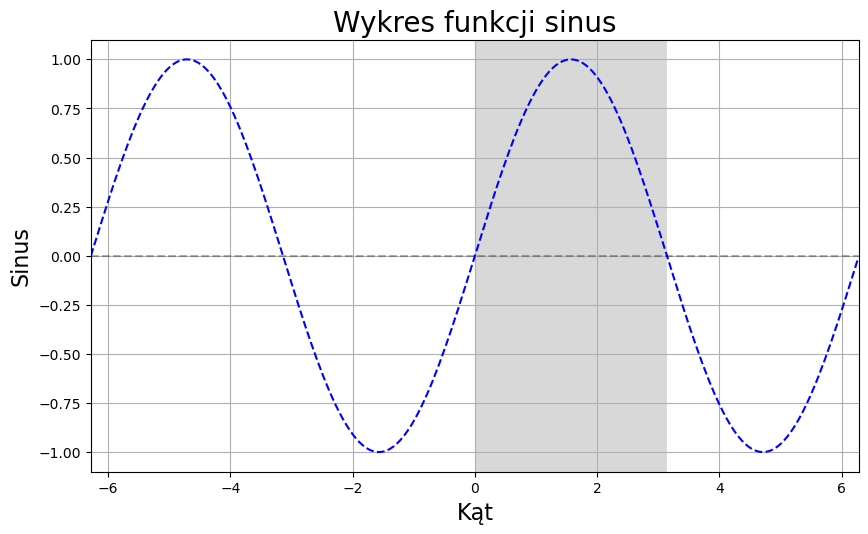

In [76]:
x = np.arange(-2*np.pi, 2*np.pi, 0.05)
y = np.sin(x)

# STWORZENIE OBIEKTU TYPU 'FIGURE' (płótna)
fig = plt.figure(figsize=(16*.6, 9*.6))
# STWORZENIE OBIEKTU TYPU 'AXES' (przestrzeni wykresu)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# EDYCJA PRZESTRZENI WYKRESU - obiektu o nazwie 'ax1'
ax1.plot(x, y, 'b--') # dodanie wykresu do przygotowanej nań przestrzeni
ax1.set_title('Wykres funkcji sinus', fontsize=20)
ax1.set_xlabel('Kąt', fontsize=16)
ax1.set_ylabel('Sinus', fontsize=16)
ax1.grid()
ax1.axhline(y=0, linestyle='--', color='black', alpha=.3)
ax1.axvspan(0, np.pi, alpha=.3, facecolor='gray')
plt.xlim(-2*np.pi, 2*np.pi)

plt.show()

<div style="text-align: justify">Uzyskałem podobny efekt (wykres funkcji sinus) przy zastosowaniu dwóch podejść, jednak to dzięki podejściu obiektowemu mam pełną kontrolę nad tym, gdzie umieszczony jest wykres, a także mogę łatwo dodawać do płótna kolejne przestrzenie z wykresami, jako warstwy lub sąsiadująco, po czym edytować ich elementy.</div>
<br></br>
<div style="text-align: justify">Poniżej, dla ilustracji, zwizualizowałem funkcje sinusa i cosinusa poprzez nałożenie ich wykresów na siebie, w ramach jednego płótna.</div>

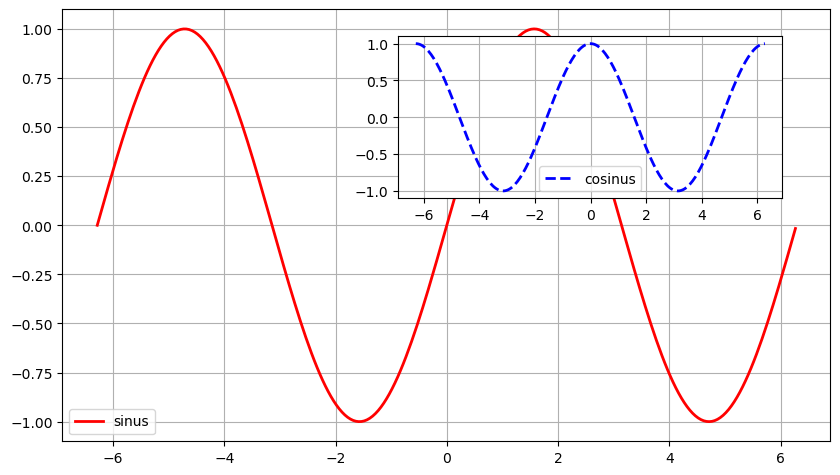

In [77]:
x = np.arange(-2*np.pi, 2*np.pi, 0.05)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure(figsize=(16*.6, 9*.6))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.45, 0.55, 0.4, 0.3])

ax1.plot(x, y, 
         linestyle='-', 
         linewidth=2, 
         color='r',
         label='sinus')
ax1.grid()
ax1.legend(loc=3)

ax2.plot(x, z, 
         linestyle='--', 
         linewidth=2, 
         color='b',
         label='cosinus')
ax2.grid()
ax2.legend()


plt.show()

### Sterowanie układem wykresów

<div style="text-align: justify">Aby nanieść więcej niż jeden wykres na płótno, tak by były one względem siebie umieszczone sąsiadująco, należy traktować je jako elementy składowe układu wykresów. Dodanie konkretnej przestrzeni wykresu jako elementu składowego do danej wizualizacji następuje przy użyciu metody <b>matplotlib.pyplot.add_subplot</b>. Kolejne parametry oznaczają: <i>liczbę wierszy siatki osi, liczbę kolumn siatki osi, indeks</i>.</div>
<br></br>
<div style="text-align: justify">Metoda <b>matplotlib.pyplot.margins</b> pozwala na dodanie marginesów do wykresu względem przestrzeni wykresu. W praktyce powoduje to skalowanie wykresu.</div>
<br></br>
<div style="text-align: justify">Poniżej naniosłem na jedno płótno przy różne typy wykresów: histogram, wykres liniowy oraz wykres rozproszenia, tak, by tworzyły one układ wykresów składowych o maksymalnych wymiarach 2 wiersze na 2 kolumny.</div>

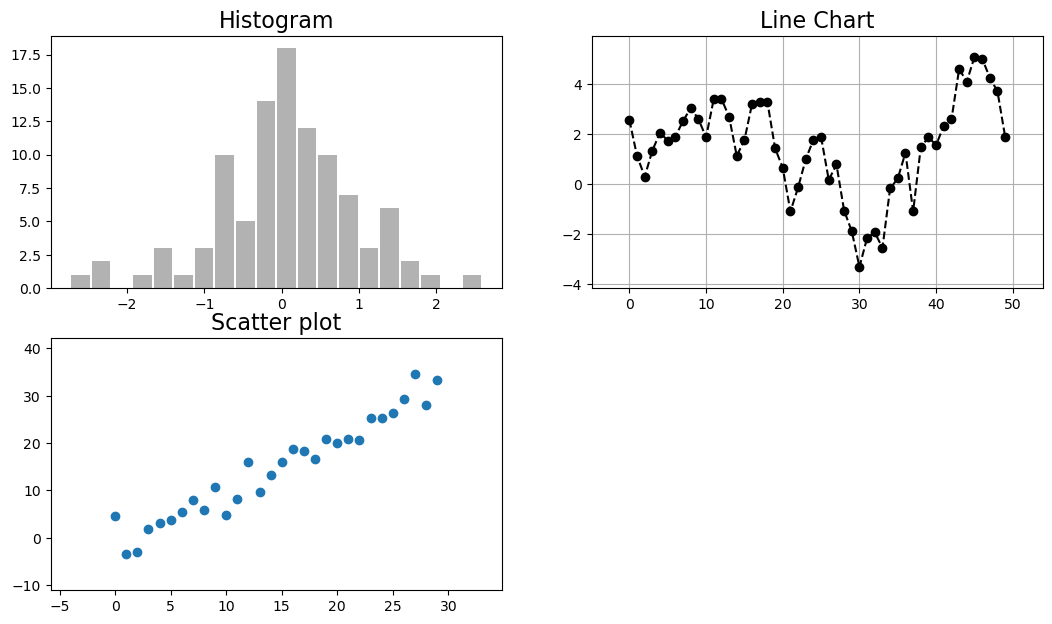

In [78]:
fig = plt.figure(figsize=(16*.8, 9*.8))

# STWORZENIE PRZESTRZENI WYKRESÓW:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# STWORZENIE WYKRESÓW NA POSZCZEGÓLNYCH PRZESTRZENIACH
ax1.hist(np.random.randn(100), 
         bins = 20, 
         color = 'k', 
         alpha = 0.3,
         rwidth=0.9)
ax2.plot(np.random.randn(50).cumsum(), 
         'k--',
         marker='o')
ax2.grid()
ax3.scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.randn(30))

ax1.set_title('Histogram', fontsize=16)
ax2.set_title('Line Chart', fontsize=16)
ax3.set_title('Scatter plot', fontsize=16)
ax2.margins(.1, .1)
ax3.margins(.2, .2)

plt.show()

<div style="text-align: justify">Aby ułatwić sobie tworzenie większej liczby wykresów lub uprościć zarządzanie nimi, można skorzystać z metody <b>matplotlib.pyplot.subplots</b>, dzięki której jesteśmy w stanie odgórnie ustalić liczbę wierszy oraz kolumn. Metoda <i>subplots</i> wywołuje także jeden obiekt płótna (fig) oraz, w zależności od argumentów <i>nrows</i> i <i>ncols</i>, obiekty przestrzeni wykresów (axes).</div>
<br></br>
<div style="text-align: justify">Dzięki temu podejściu możemy dostosowywać niektóre elementy wykresów, szczególnie te tożsame dla wszystkich wykresów, poprzez iterację. W poniższym przykładzie obiekt <i>axes</i> to tak naprawdę tablica obiektów - przestrzeni wykresów, której rozmiar zależy od ustalonej liczby wierszy i kolumn.</div>

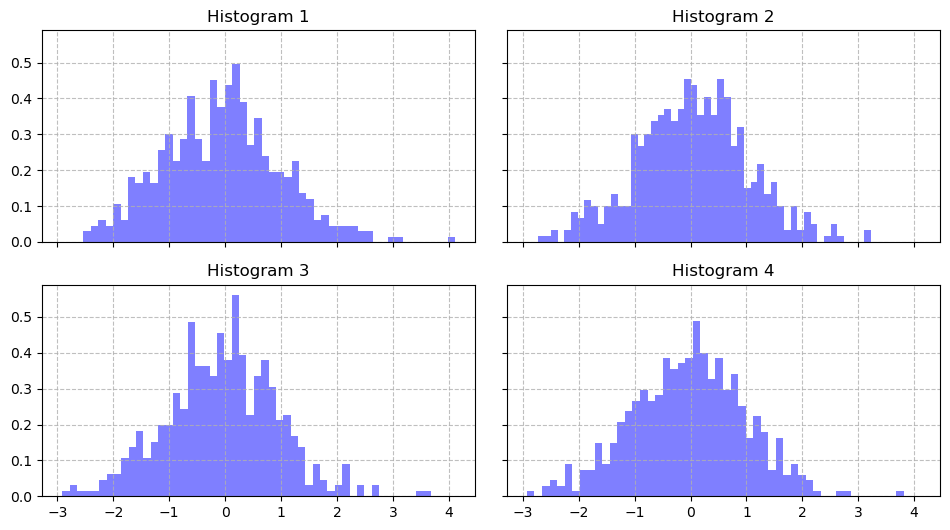

In [79]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         sharex=True, 
                         sharey=True, 
                         figsize=(16*.6, 9*.6))
# Parametry 'sharex' oraz 'sharey' definiują, czy wyrazy składowe mają
# dzielić ze sobą osie X oraz Y.

# "Spłaszczenie" obiektu typu axes:
axes = np.ravel(axes)
# STWORZENIE HISTOGRAMU WIZUALIZUJĄCEGO PRÓBKĘ Z ROZKŁADU NORMALNEGO
# DLA KAŻDEJ PRZESTRZENI WYKRESU POPRZEZ ITERACJĘ:
for index, ax in enumerate(axes):
    r = np.random.randn(500)
    ax.hist(r,
            density=True,
            bins=50,
            color='b',
            alpha=.5,
            rwidth=1)
    ax.set_title('Histogram ' + str(index + 1))
    ax.grid(alpha=.8, ls='--')

fig.tight_layout(h_pad=1, w_pad=2)
plt.show()


<div style="text-align: justify">Problem nachodzących na siebie wykresów można rozwiązać wykorzystując metodę <b>Figure.tight_layout</b> automatycznie dostosowującą pozycje wykresów. Jest to alternatywa dla metody matplotlib.pyplot.subplots_adjust. Funkcja posiada parametry umożliwiającę dokładniejsze dostosowanie układu obiektów:</div>

- pad - wolna przestrzeń (padding) między brzegami płótna i granicami wykresów
- h_pad, w_pad - wolna przestrzeń (wysokość / szerokość) między wykresami
- rect - zastosowanie paddingu do określonej przestrzeni wykresu poprzez podanie indeksu

# Typy wykresów i zaawansowane wizualizacje

### Informacje o zestawie danych

<div style="text-align: justify">Celem przedstawienia typów wykresów bardziej zaawansowanych wizualizacji użytecznych przy analizie danych lub stosowaniu algorytmów uczenia maszynowego, posłużę się zestawem danych <b>Penguins (Palmer Archipelago)</b>. Wykorzystany zestaw danych nie posłuży jako obiekt właściwej analizy wykonanej w ramach pracy magisterskiej, lecz jako poręczne narzędzie do ukazania możliwości pakietu <b>Matplotlib</b> w ramach tego raportu.</div>
<br></br>
Informacje o zestawie danych: [TO DO]


Źródło danych: <a href=https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data>https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data</a>

Opis zmiennych:
- **species**: gatunek pingwina (Chinstrap, Adélie lub Gentoo)
- **culmen_length_mm**: długość dzioba (w mm)
- **culmen_depth_mm**: głębokość dzioba (w mm)
- **flipper_length_mm**: długość skrzydła (w mm)
- **body_mass_g**: masa ciała (w g)
- **island**: wyspa na Archipelagu Palmera (Dream, Torgersen lub Biscoe), na której egzystuje pingwin
- **sex**: płeć pingwina

#### Wczytanie i wyświetlenie "surowych" danych

In [80]:
rawdata = pd.read_csv('penguins.csv')
rawdata

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Wizualizacja wartości pustych

<div style="text-align: justify">Po rozpoczęciu procesu analizy danych, można wykorzystać pakiet <b>Matplotlib</b> do wizualizacji tzw. wartości pustych (NULL) w zestawie danych. Uczynię to na dwa sposoby: przy użyciu wyłącznie narzędzi Matplotlib i funkcji <b>matplotlib.pyplot.imshow</b>, służącej do wyświetlania danych jako obrazu, a także przy pomocy funkcji rysowania mapy termicznej (bądź <i>mapy ciepła</i>) z pomocniczego pakietu Seaborn: <b>seaborn.heatmap</b>.</div>

In [81]:
# Sprawdzam, w których kolumnach i w jakiej liczbie występując wartośći puste
rawdata.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [82]:
# Wyświetlam wiersze zawierające wartości puste
rawdata[rawdata.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


#### Wizualizacja wartości pustych - pakiet Matplotlib

In [165]:
def show_nulls(data, ylabel='index', color='Oranges'):
    "Funkcja wizualizująca wartości puste w zbiorze danych"
    
    # Użycie wbudowanego stylu wykresu:
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(16*.7, 9*.7))
    
    ax.imshow(data.isnull(),
              aspect=len(data.columns)/len(data),
              cmap=color,
              interpolation='none')
    # aspect - format obrazu (aspect ratio)
    # cmap - ustawienie wbudowanej mapy kolorów
    # interpolation - ustawienie / wyłączenie interpolacji
    
    ax.set_ylabel(str(ylabel), fontsize=12)
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=90)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(axis='both', linestyle='--')
    
    # Etykieta każdej kolumny zawierającej wartości puste zostanie pogrubiona
    for index in range(len(list(ax.get_xticklabels()))):
        if data.isnull().sum()[index] != 0:
            ax.get_xticklabels()[index].set_fontweight("bold")

    plt.show()
    # Przywrócenie stylu do domyślnego:
    plt.style.use('default')

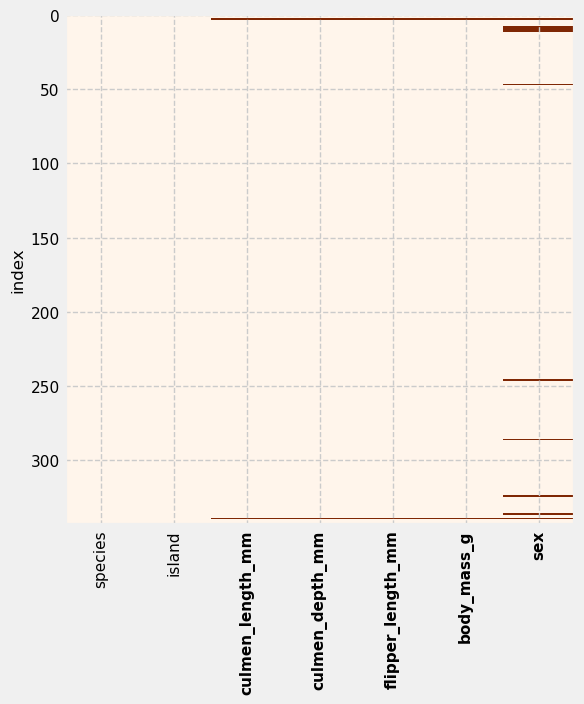

In [164]:
show_nulls(rawdata)

#### Wizualizacja z pomocą pakietu Seaborn

In [166]:
def show_nulls_sns(data, color='Oranges'):
    "Funkcja wizualizująca wartości puste w zbiorze danych z użyciem pakietu Seaborn"
    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(16*.5, 9*.5))
    sns.heatmap(data.isnull(), 
                cmap=color, 
                cbar=False)
    
    plt.ylabel('index', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    
    plt.show()
    plt.style.use('default')

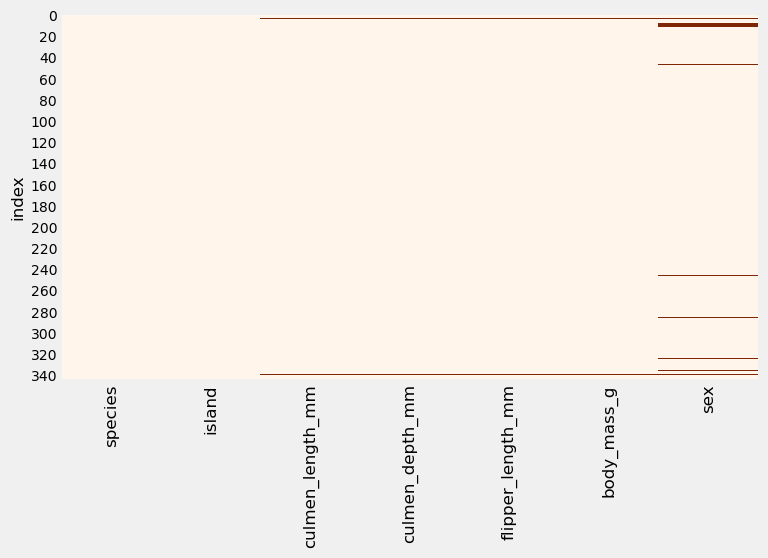

In [167]:
show_nulls_sns(rawdata)

In [87]:
# Usunięcie wierszy z wartościami pustymi
data = rawdata.dropna()
data.reset_index(drop=True, inplace=True)
data.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

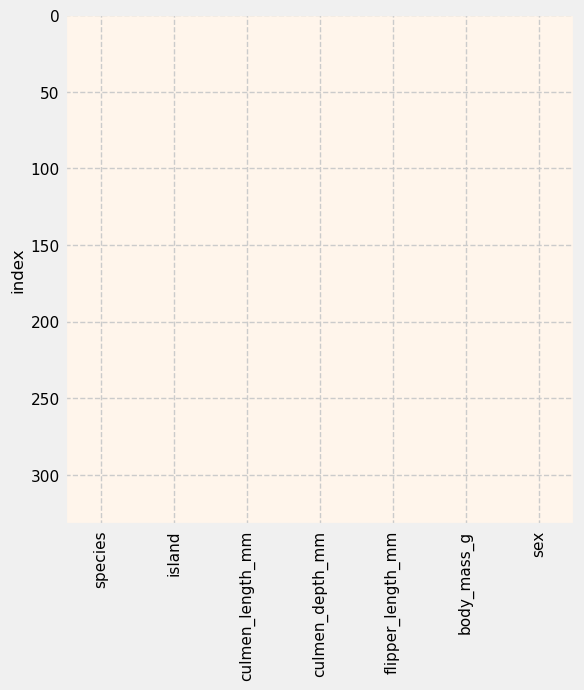

In [88]:
# Ponowne użycie funkcji wizualizującej wartości puste
show_nulls(data)

### Przygotowanie danych do dalszych wizualizacji

In [89]:
model_data = data.copy()
model_data.drop('island', axis=1)

encoder = LabelEncoder()
maps = list()

for col_name in ['species', 'island', 'sex']:
    model_data[col_name] = encoder.fit_transform(model_data[col_name])
    value_map = {index: label for index, label in enumerate(encoder.classes_)}
    maps.append(value_map)

In [90]:
X = model_data.drop(['species', 'island'], axis=1)
Y = model_data.species

scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(266, 5) (67, 5) (266,) (67,)


### Podstawowe typy wykresów

#### Wykres słupkowy (bar plot)

Wykres słupkowy jest typem wykresu używanym do wizualizacji zmiennej dyskretnej, konkretniej do jej wartosci lub częstotliwości występowania.

Do narysowania wykresu słupkowego w Matplotlib służy funkcja <b>matplotlib.pyplot.bar</b>.

Poniższy wykres słupkowy wizualizuje liczbę wystąpień pingwinów danego gatunku (zmienna dyskretna) w zestawie danych.

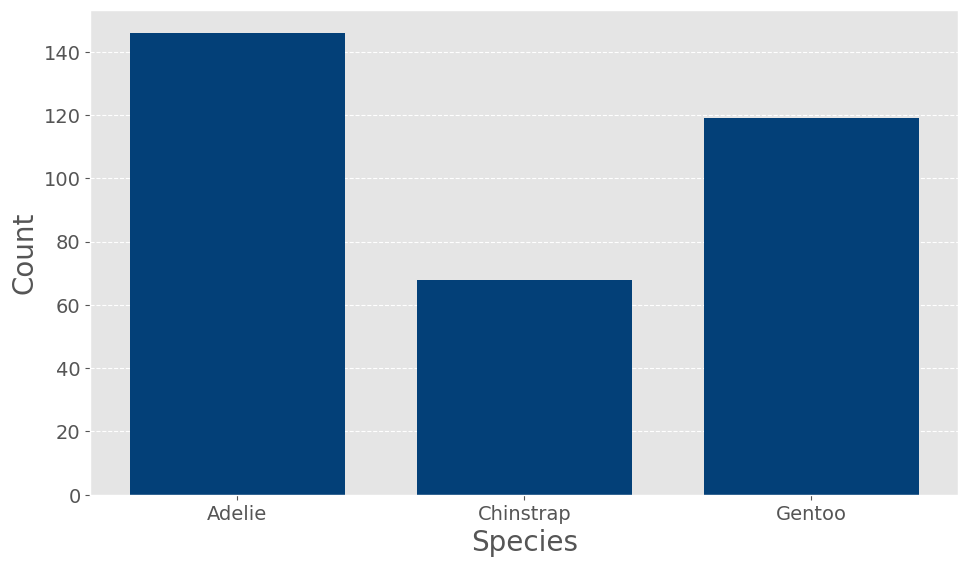

In [92]:
# Przygotowanie etykiet dla osi X oraz dopasowanie wartości (oś Y)
labs = list(data.species.unique())
count = list(data.groupby('species').count()['island'])

# Użycie domyślnego stylu
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16*.7, 9*.7))
ax.bar(x=labs,
       height=count,
       color='#034078',
       width=.75,
       align='center')
# x - koordynaty X wykresu
# height - wysokość (wartość) słupków
# color - kolor słupka
# width - szerokość słupka (domyślnie: 0.8)
# align - położenie słupków względem koordynatu X

ax.set_xlabel('Species', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.tick_params(axis='both', labelsize=14)

# Dostosowanie siatki
ax.grid(axis='y', linestyle="--")
ax.grid(axis='x', b=None)

plt.show()
plt.style.use('default')

#### Horyzontalny wykres słupkowy

Wykres słupkowy ułożony horyzontalnie można uzyskać używając funkcji <b>matplotlib.pyplot.barh</b> oraz odpowiednio zamieniając wartości parametrów (x -> y, height -> width).

Poniższy wykres przedstawia średnią długość skrzydła pingwina według jego gatunku (zmiennej dyskretnej).

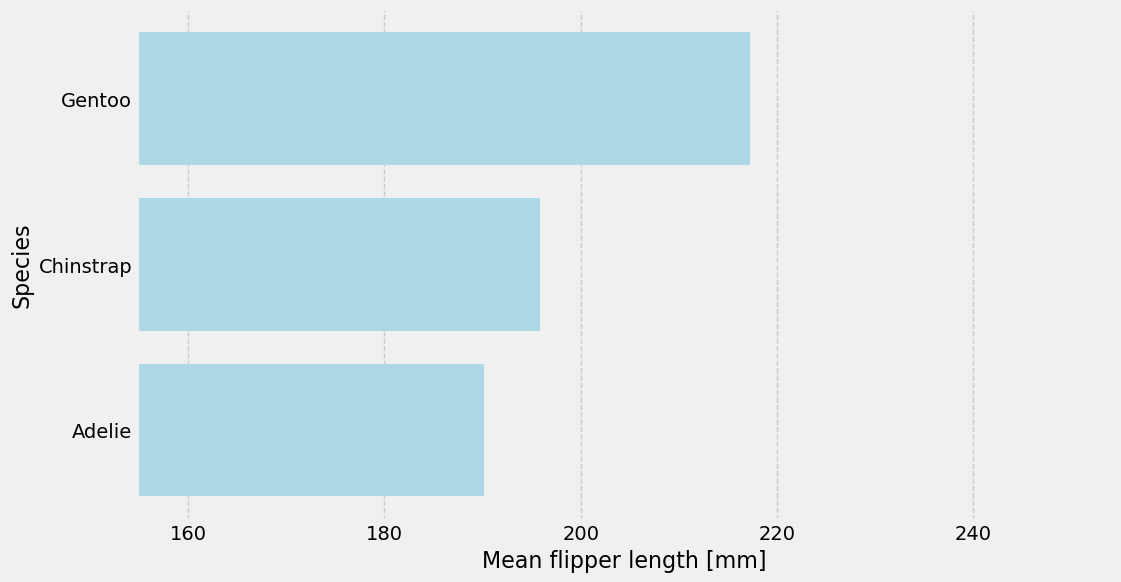

In [93]:
labs = list(data.species.unique())
values = list(data.groupby('species').mean()['flipper_length_mm'])
xmin = data['flipper_length_mm'].min()
xmax = data['flipper_length_mm'].max()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(16*.7, 9*.7))
ax.barh(y=labs,
        width=values,
        color='lightblue')
ax.set_ylabel('Species', fontsize=16)
ax.set_xlabel('Mean flipper length [mm]', fontsize=16)

ax.grid(axis='x', linestyle="--")
ax.grid(axis='y', b=None)
# Skalowanie osi poprzez zmianę zakresu wartości dla osi X
ax.set_xlim(xmin - xmin/10,
            xmax + xmax/10)

plt.show()
plt.style.use('default')

#### Grupowany wykres słupkowy
<br></br>
<div style="text-align: justify">Tworzenie grupowanego wykresu słupkowego w Matplotlib polega na nałożeniu na siebie dwóch wykresów słupkowych i odpowiedniemu dopasowaniu ich względem siebie. Mniej kłopotliwe wydaje się wykonanie tego typu wizualizacji przy użyciu pakietu Seaborn i funkcji <b>seaborn.barplot</b> lub funkcji <b>seaborn.catplot</b> i jako rodzaju (<i>kind</i>) wskazanie wykresu słupkowego (<i>bar</i>).</div>
<br></br>
<div style="text-align: justify">Poniższe wykresy wizualizują średnią masę ciała pingwina według jego gatunku, osobno dla każdej płci. Ponadto horyzontalną linią oznaczona została analogiczna średnia dla całego zestawu danych.</div>

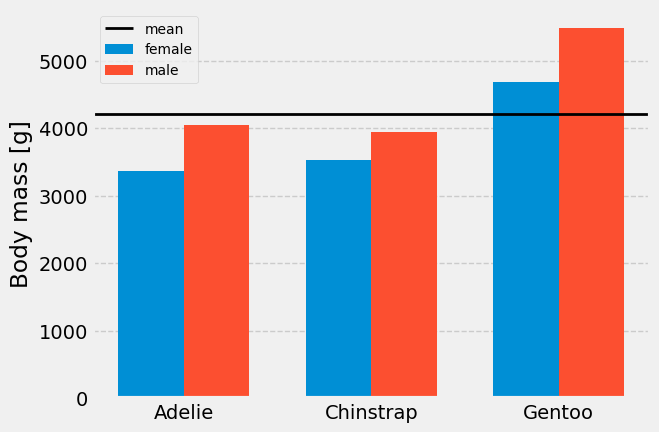

In [94]:
# Przygotowanie danych:
labs = list(data.species.unique())
val_f = data[data.sex == 'FEMALE'].groupby('species').mean()['body_mass_g']
val_m = data[data.sex == 'MALE'].groupby('species').mean()['body_mass_g']
width = 0.35
x_ind = np.arange(len(labs))


plt.style.use('fivethirtyeight')
plt.bar(x=x_ind, 
        height=val_f, 
        width=width, 
        label='female')
plt.bar(x=x_ind+width, 
        height=val_m, 
        width=width, 
        label='male')

plt.ylabel('Body mass [g]')
plt.xticks(x_ind + width / 2, labs)
plt.axhline(y=data['body_mass_g'].mean(),
            color='k',
            linestyle='-',
            linewidth=2,
            label='mean')
plt.legend(loc='best', fontsize=10)
plt.grid(axis='x', b=None)
plt.grid(axis='y', linestyle="--")

plt.show()
plt.style.use('default')

Grupowany wykres słupkowy z użyciem pakietu Seaborn i funkcji <b>seaborn.barplot</b>:

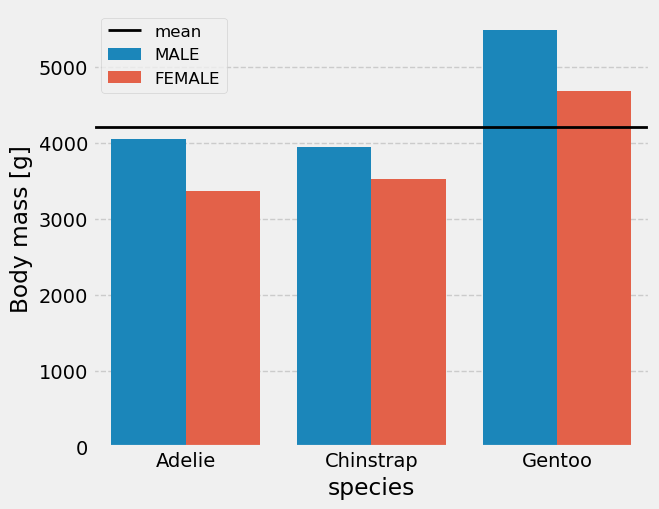

In [95]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(16*.4, 9*.6))
ax = sns.barplot(data=data, 
                 x='species', 
                 y='body_mass_g', 
                 hue='sex',
                 ci=None)
ax.axhline(y=data['body_mass_g'].mean(),
           color='k',
           linestyle='-',
           linewidth=2,
           label='mean')
ax.set_ylabel('Body mass [g]')
ax.legend(loc='best', fontsize=12)
ax.grid(axis='y', linestyle="--")

plt.show()
plt.style.use('default')

#### Diagram kołowy

matplotlib.pyplot.pie

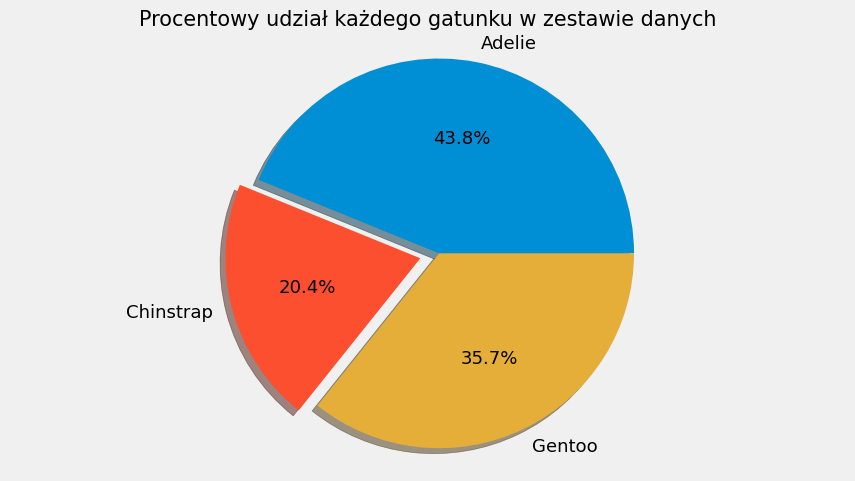

In [96]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(16*.6, 9*.6))
ax.pie(x=list(data.groupby('species').count()['island']),
       labels=list(data.species.unique()),
       shadow=True,
       explode=(0,.1,0),
       autopct='%1.1f%%',
       startangle=0,
       textprops={'fontsize': 13})
# Parametry funkcji:
# x - tablica wartości
# labels - ustawienie etykiet wycinków diagramu
# shadow - dodanie efektu cienia
# explode - ustawienie wyróżnienia wycinka / wycinków
# autopct - ustawienie formatowania wartości
# startangle - dostosowanie kąta, o jaki obrócony jest diagram kołowy
# textprops - ustawienia etykiet wartości
ax.set_title('Procentowy udział każdego gatunku w zestawie danych', 
             fontsize=15)
ax.axis('equal')
plt.show()
plt.style.use('default')

### Wizualizacja korelacji między atrybutami

#### Wykres korelacji
<br></br>
<div style="text-align: justify">Współczynnik korelacji Pearsona pozwala na sprawdzenie poziomu zależności liniowej między dwiema zmiennymi ilościowymi. Wynik korelacji waha się w przedziale od -1 do 1. Im bliżej wartości zero, tym mniejszy związek między atrybutami.</div>
<br></br>
<div style="text-align: justify">Dzięki funkcji <b>pandas.DataFrame.corr</b> z biblioteki <b>Pandas</b> utworzyłem macierz korelacji Pearsona w postaci ramki danych. Następnie dokonałem wizualizacji macierzy zależności, podobnie jak w przypadku wizualizacji wartości pustych, na dwa sposoby: przy użyciu wyłącznie narzędzi Matplotlib i funkcji matplotlib.pyplot.imshow, a także przy pomocy pakietu Seaborn i funkcji seaborn.heatmap. Utworzyłem w tym celu dwie funkcje.</div>

In [97]:
# Stworzenie macierzy korelacji Pearsona
corr = model_data.corr(method='pearson')
corr

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
culmen_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
culmen_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


In [98]:
def correlation_plot(corr, half=False):
    "Funkcja wizualizująca korelację Persona między atrybutami"
    # Ustawienie parametru "half" jako True pozwala na pominięcie zduplikowanych informacji oraz wartości z głównej przekątnej
    
    plt.style.use('default')
    sns.set_style("white")
    
    if half:
        m = np.zeros_like(corr, dtype=np.bool)
        m[np.triu_indices_from(m)] = True
        corr = corr.mask(m)
    
    color_map = sns.diverging_palette(260, 10, as_cmap=True)
    tick_marks = data.columns
    width, height = corr.shape
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(16*.6, 9*.6))
    plt.imshow(corr, cmap=color_map)
    plt.colorbar()
    plt.title('Correlation between attributes', fontsize=16)
    plt.xticks(np.arange(len(tick_marks)), 
               tick_marks, 
               rotation=90, 
               fontsize=12)
    plt.yticks(np.arange(len(tick_marks)), 
               tick_marks, 
               fontsize=12)
    
    for x in range(width):
        for y in range(height):
            if str(corr.iloc[x,y]) != 'nan': 
                plt.annotate(str(round(corr.iloc[x,y], 2)), 
                             xy=(y, x), 
                             horizontalalignment='center',
                             verticalalignment='center',
                             fontsize=12)

          
    plt.show()

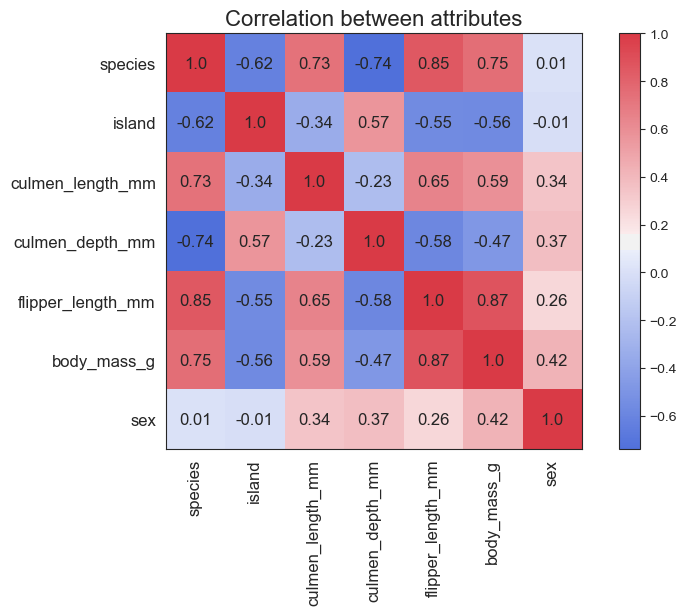

In [99]:
correlation_plot(corr, half=False)

In [100]:
def correlation_plot_sns(corr, half=False):
    "Funkcja wizualizująca korelację Persona między atrybutami z użyciem pakietu Seaborn"
    # Ustawienie parametru "half" jako True pozwala na pominięcie zduplikowanych informacji oraz wartości z głównej przekątnej 

    plt.style.use('default')
    sns.set_style("white")
    color_map = sns.diverging_palette(260, 10, as_cmap=True)
    m = half
    
    if m:
        m = np.zeros_like(corr, dtype=np.bool)
        m[np.triu_indices_from(m)] = True
    
    plt.figure(figsize=(12,9))
    plt.title('Correlation between attributes', fontsize=18)
    heat_map = sns.heatmap(corr, 
                           annot=True,
                           annot_kws={"fontsize": 18},
                           square='square',
                           mask=m, 
                           cmap=color_map,
                           fmt='.2g',
                           linewidths=5,
                           vmax=1.1,
                           vmin=-1.1)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), 
                             rotation=0, 
                             fontsize=20)
    heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                             rotation=90,
                             fontsize=20)
    plt.show()

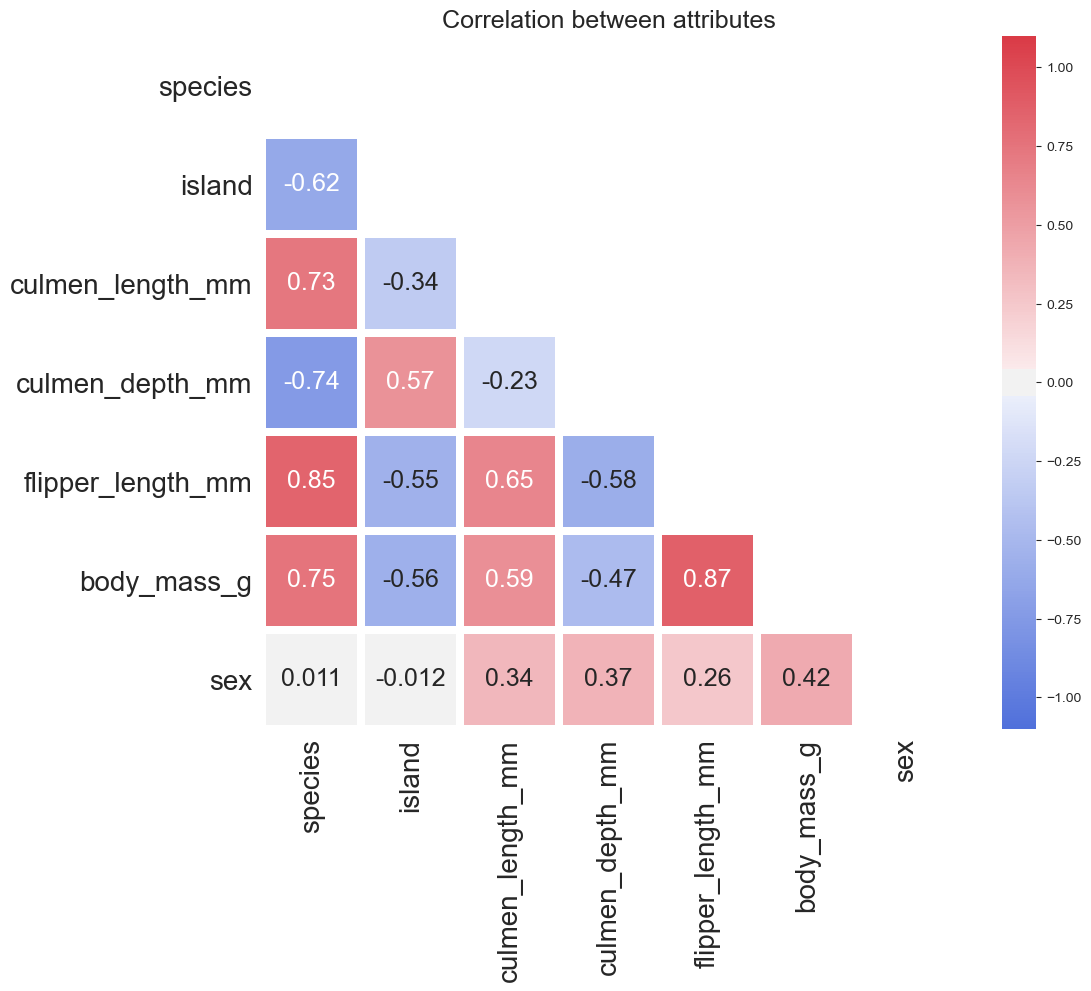

In [101]:
correlation_plot_sns(corr, half=True)

#### Wykres rozproszenia (wykres punktowy)
<br></br>
<div style="text-align: justify">Najpopularniejszym typem wykresu wykorzystywanym celem zwizualizowania na kartezjańskim układzie współrzędnych zależności (korelacji) pomiędzy dwiema cechami, a najczęściej cechami ciągłymi, jest wykres rozproszenia. Wykres ten nie tylko pokazuje jaki jest poziom zależności, ale także wskazuje wartości odstające, które mogą zakłócać wartość współczynnika korelacji, np. korelacji Pearsona.</div>
<br></br>
<div style="text-align: justify">Do naniesienia wykresu rozproszenia używa się w Matplotlib funkcji <b>matplotlib.pyplot.scatter</b>. Nie posiada ona jednak wbudowanej możliwości wizualizacji danych z podziałem na kategorie - aby ułatwić sobie zadanie można skorzystać z funkcji <b>seaborn.scatterplot</b> z pakietu Seaborn. Napisałem więc, podobnie jak w przypadku wykresu korelacji, dwie funkcje, przy czym do pierwszej z nich, stworzonej wyłącznie przy użyciu narzędzi z Matplotlib, zaimplementowałem możliwość podziału danych na kategorie.</div>
<br></br>
<div style="text-align: justify">Poniższe wizualizacje potwierdzają: silną dodatnią korelację (+0.65) między długością skrzydła, a długością dzioba pingwina oraz słabą ujemną korelację (-0.23) między głębokością, a długością dzioba pingwina.</div>

In [102]:
def draw_scatter(data, x, y, xlabel='x', ylabel='y', title='', hue=False):
    "Funkcja rysująca wykres rozproszenia"
    
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(16*.6, 9*.6))
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(str(xlabel), fontsize=14)
    ax.set_ylabel(str(ylabel), fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    
    if hue:
        categories = list(data[str(hue)].unique())
        for cat in categories:
            x_ax = data[data[str(hue)] == str(cat)][str(x)]
            y_ax = data[data[str(hue)] == str(cat)][str(y)]
            ax.scatter(x_ax, y_ax)
        ax.legend(categories, loc='best', title=str(hue))
    else:
        x_ax = data[str(x)]
        y_ax = data[str(y)]
        ax.scatter(x_ax, y_ax, color='k')
        
    plt.show()
    plt.style.use('default')

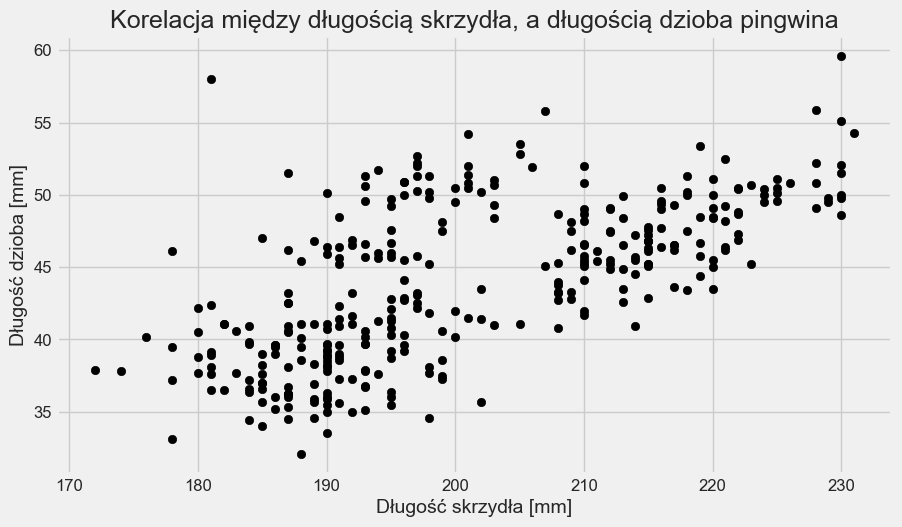

In [103]:
draw_scatter(data=data, 
             x='flipper_length_mm', 
             y='culmen_length_mm',
             xlabel='Długość skrzydła [mm]',
             ylabel='Długość dzioba [mm]',
             title='Korelacja między długością skrzydła, a długością dzioba pingwina')

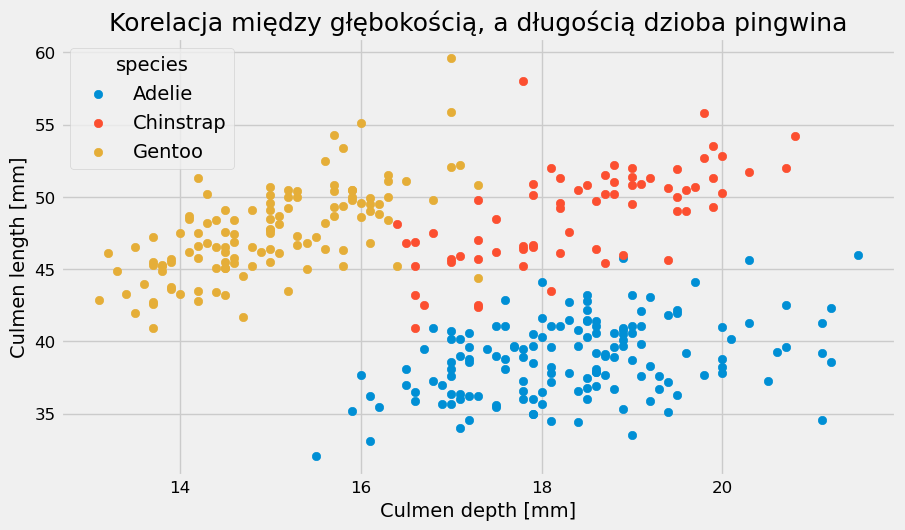

In [104]:
draw_scatter(data=data, 
             x='culmen_depth_mm', 
             y='culmen_length_mm',
             xlabel='Culmen depth [mm]',
             ylabel='Culmen length [mm]',
             hue='species',
             title='Korelacja między głębokością, a długością dzioba pingwina')

In [105]:
def draw_scatter_sns(data, x, y, hue, xlabel='x', ylabel='y', show_mean=False, 
                     grid=False, reg=False, title=''):
    """
    Funkcja rysująca wykres rozproszenia z użyciem pakietu Seaborn
    
    show_mean - zaznacza średnie w postaci linii według kategorii
    grid - pokazuje siatkę
    reg - wysuje linie regresji według kategorii
    """
    
    plt.style.use('default')
    sns.set_style("white")
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    plt.figure(figsize=(11,11))
    sns.scatterplot(data=data, 
                    s=150, 
                    x=str(x), 
                    y=str(y), 
                    hue=str(hue), 
                    legend='full')
    plt.title(str(title), fontsize=22)
    plt.xlabel(str(xlabel), fontsize=20)
    plt.ylabel(str(ylabel), fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    
    if grid:
        plt.grid(linestyle='--', 
                 linewidth=1, 
                 alpha=.5, 
                 color='gray')
    
    if show_mean:
        c = 0
        for s in list(data[str(hue)].unique()):
            plt.axvline(x=data[data[str(hue)] == s][str(x)].mean(),
                        linewidth=2,
                        linestyle='--',
                        color=colors[c],
                        alpha=.6)
            plt.axhline(y=data[data[str(hue)] == s][str(y)].mean(),
                        linewidth=2,
                        linestyle='--',
                        color=colors[c],
                        alpha=.6)
            c = c + 1
    
    if reg:
        for s in list(data[str(hue)].unique()):
            m, b = np.polyfit(data[data[str(hue)] == s][str(x)], 
                              data[data[str(hue)] == s][str(y)], 
                              1)
            x_plot = np.linspace(data[data[str(hue)] == s][str(x)].min(),
                                 data[data[str(hue)] == s][str(x)].max(),
                                 num=len(data[data[str(hue)] == s][str(x)]))
            plt.plot(x_plot, m*x_plot + b)
    
    plt.legend(loc='best')

    plt.show()

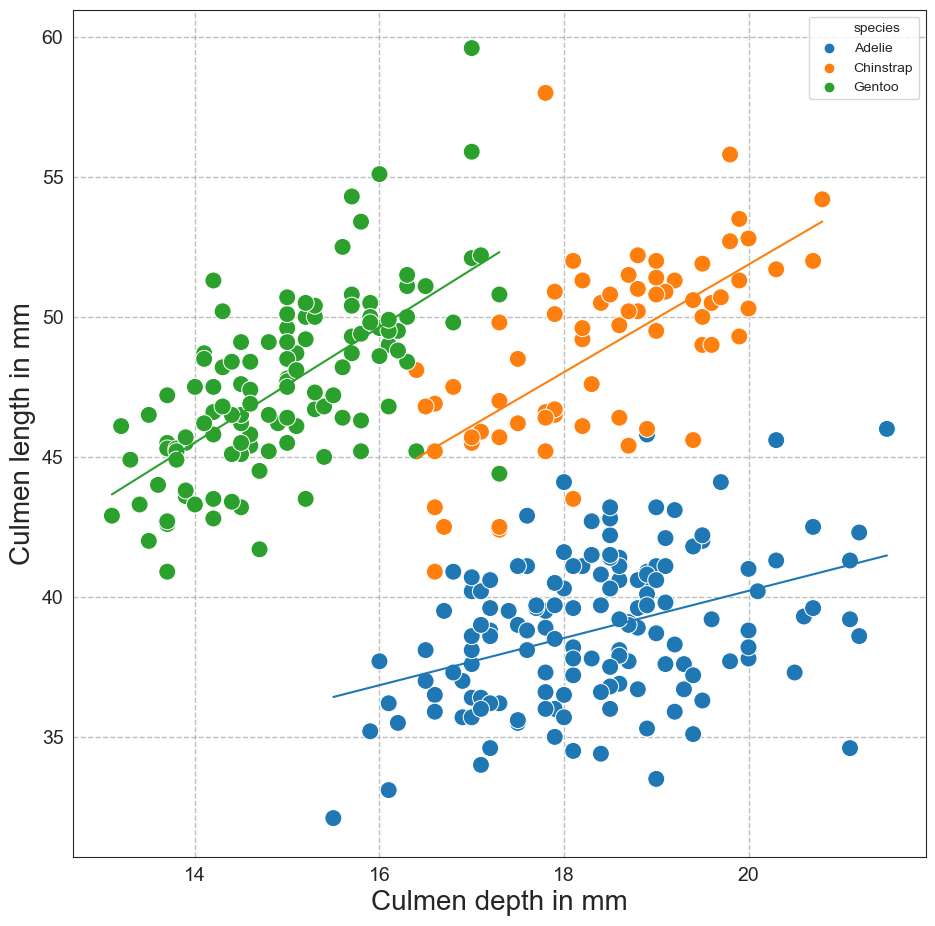

In [106]:
draw_scatter_sns(data, 
                 x='culmen_depth_mm', 
                 y='culmen_length_mm',
                 xlabel='Culmen depth in mm',
                 ylabel='Culmen length in mm',
                 hue='species',
                 grid=True,
                 reg=True)

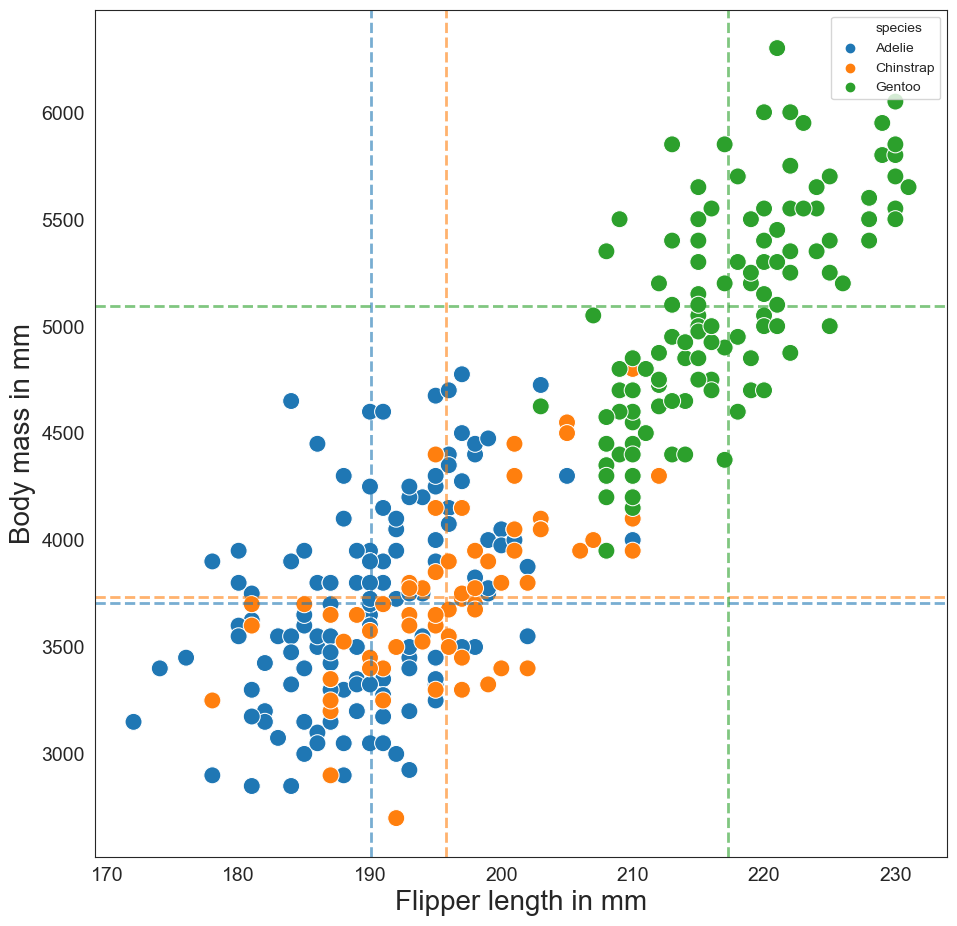

In [107]:
draw_scatter_sns(data, 
                 'flipper_length_mm', 
                 'body_mass_g',
                 xlabel='Flipper length in mm',
                 ylabel='Body mass in mm',
                 hue='species',
                 show_mean=True)

<div style="text-align: justify">Dzięki pakietowi seaborn można sprawniej, za pomocą jednej funkcji, stworzyć wykres rozproszenia wraz z linią regresji. Służy do tego funkcja <b>seaborn.regplot()</b>. Poniżej przedstawiłem przykładową funkcję realizującą tę wizualizację.</div>

In [108]:
def draw_regplot(data, x, y, xlabel=False, ylabel=False, p_color='black', p_size=100, l_color='red', title=False, grid=True, ci=None):
    "Funkcja rysująca wykres rozproszenia z linią regresji"
    
    plt.style.use('ggplot')
    plt.figure(figsize=(16*.6, 9*.6))
    sns.regplot(x=x,
                y=y,
                data=data,
                scatter_kws={"s": p_size, "color": p_color},
                line_kws={"linewidth": 5, "color": l_color},
                ci=ci)
    if title: 
        plt.title(str(title), fontsize=20)
    if xlabel:
        plt.xlabel(str(xlabel), fontsize=16)
    else:
        plt.xlabel(str(x), fontsize=16)
    if ylabel:
        plt.ylabel(str(ylabel), fontsize=16)
    else:
        plt.ylabel(str(y), fontsize=16)
    plt.xticks(size=14)
    plt.yticks(size=14)
    
    if grid:
        plt.grid(linestyle='--', 
                 linewidth=1, 
                 alpha=.7)
    
    plt.show()
    plt.style.use('default')

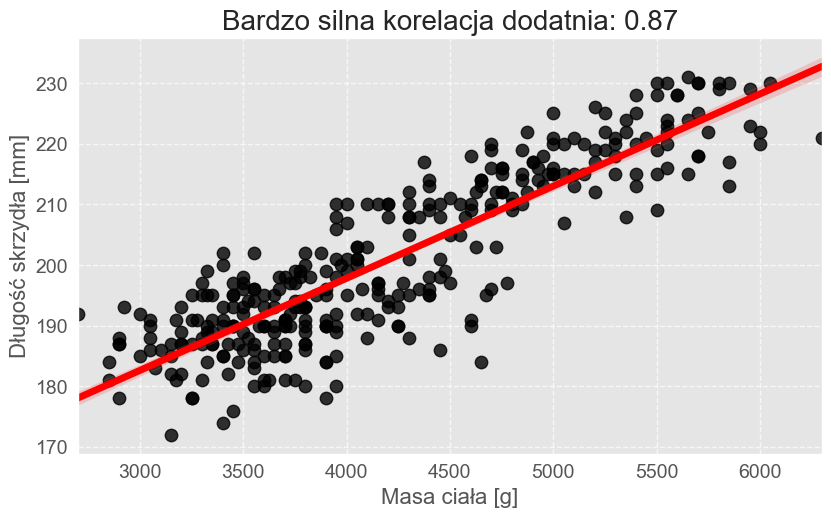

In [109]:
draw_regplot(data, 
             'body_mass_g',
             'flipper_length_mm',
             title='Bardzo silna korelacja dodatnia: 0.87',
             xlabel='Masa ciała [g]',
             ylabel='Długość skrzydła [mm]',
             p_size=80,
             grid=True, 
             ci=90)

<div style="text-align: justify">Wspomagając pakiet Matplotlib możliwościami funkcji z pakietu Seaborn można wykonywać bardziej obszernych, a zarazem kompaktowych wizualizacji.</div>
<br></br>
<div style="text-align: justify">Funkcja <b>seaborn.FacetGrid</b> pozwala na tworzenie siatki wykresów wizualizujących wielowątkowe relacje między zmiennymi (przy analogicznym sposobie wizualizacji w pakiecie ggplot2 nazywa się panelami - facets). Ponadto można dokonać podziału rekordów ze względu na przynależność do wskazanej kategorii (hue).</div>

<Figure size 960x540 with 0 Axes>

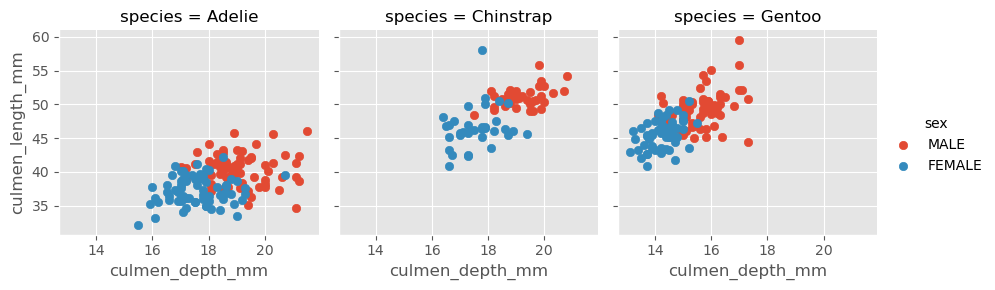

In [110]:
plt.style.use('ggplot')
plt.figure(figsize=(16*.6, 9*.6))
scatterplot = sns.FacetGrid(data,
                            col='species',
                            hue='sex')
scatterplot = scatterplot.map(plt.scatter, 
                              'culmen_depth_mm', 
                              'culmen_length_mm').add_legend()
plt.show()
plt.style.use('default')

#### Jitter plot
<br></br>
<div style="text-align: justify">Jitter plot pozwala na uniknięcie problemów z nakładaniem się na siebie wartości przy okazji rysowania wykresów punktowych. Dokonuje się tego poprzez wizualne rozproszenie wartości. Jitter plot można stosować w sytuacji, gdy na wykresie rozproszenia chce się nanieść dwie zmienne, z czego jedna z nich jest zmienną dyskretną (skokową) lub kategoryczną.</div>
<br></br>
<div style="text-align: justify">Tego typu wizualizacji można dokonać posługując się narzędziami Matplotlib oraz funkcją z pakietu Seaborn - <b>seaborn.strippplot</b>.</div>

Poniżej przedstawiłem próbę wizualizacji korelacji między zmienną dyskretną (wyspa, którą zamieszkują pingwiny), a zmienną ciągłą (masa ciała pingwina w gramach). 

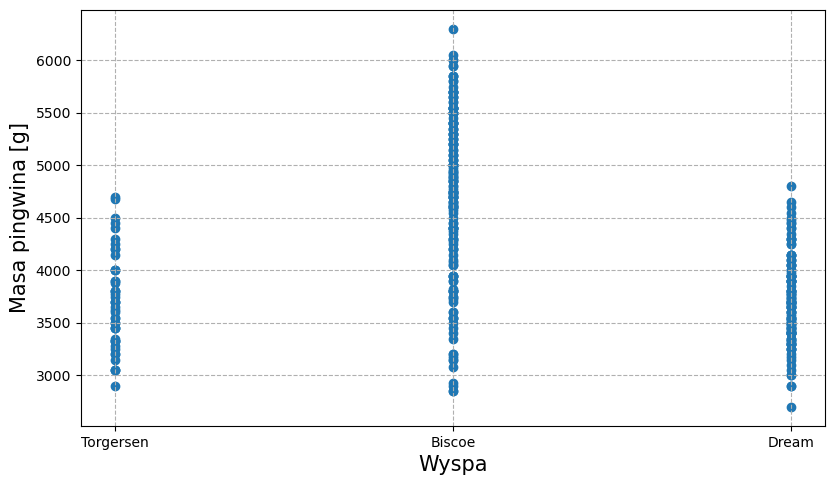

In [111]:
fig, ax = plt.subplots(figsize=(16*.6, 9*.6))
ax.scatter(data['island'], data['body_mass_g'])
ax.set_xlabel('Wyspa', fontsize=15)
ax.set_ylabel('Masa pingwina [g]', fontsize=15)
ax.grid(ls='--')

plt.show()

<div style="text-align: justify">Poniżej ta sama wizualizacja przy użyciu funkcji z pakietu Seaborn. Parametr <i>jitter</i> odpowiada za poziom drgań (rozproszenia punktów wokół właściwej wartości). Ponadto można łatwo podzielić dane na kategorie - parametr <i>hue</i>, a także rozdzielić je według ów kategorii na dwie osobne "osie" - parametr <i>dodge</i>.</div>

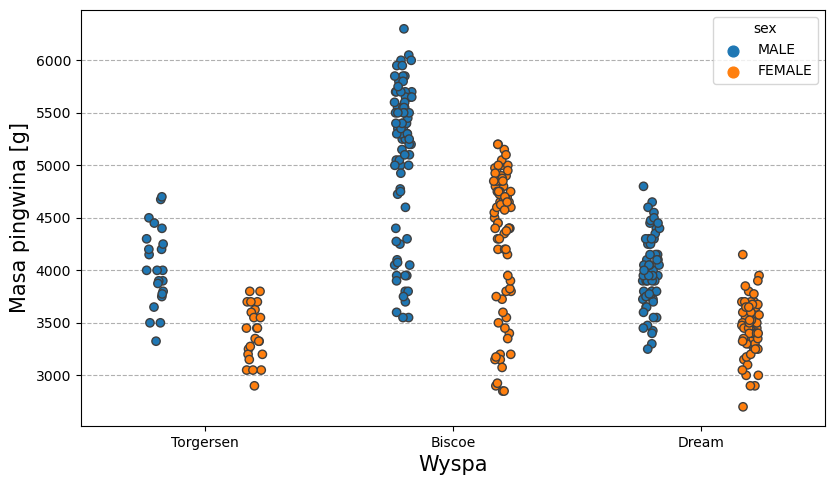

In [112]:
fig, ax = plt.subplots(figsize=(16*.6, 9*.6))
ax = sns.stripplot(x='island', 
                   y='body_mass_g', 
                   data=data, 
                   jitter=0.07,
                   size=6,
                   linewidth=1,
                   hue='sex',
                   dodge=True)

ax.set_xlabel('Wyspa', fontsize=15)
ax.set_ylabel('Masa pingwina [g]', fontsize=15)
ax.grid(axis='y', ls='--')

plt.show()

#### Korelogram

<div style="text-align: justify">Funkcja <b>seaborn.pairplot</b> tworzy siatkę wykresów rozproszenia wizualizujących korelację między wszystkimi parami ciągłych zmiennych numerycznych - tzw. korelogram. To, w jaki sposób dokonywana jest ów wizualizacja, zależy od parametru <i>kind</i>. Siatka zawiera także wykresy gęstości wizualizujące dystrybucję wartości zmiennych w zależności od kategorii - <i>hue</i>, w postaci histogramów lub wykresów gęstości - reguluje to parametr <i>diag kind</i>.</div>

<Figure size 960x540 with 0 Axes>

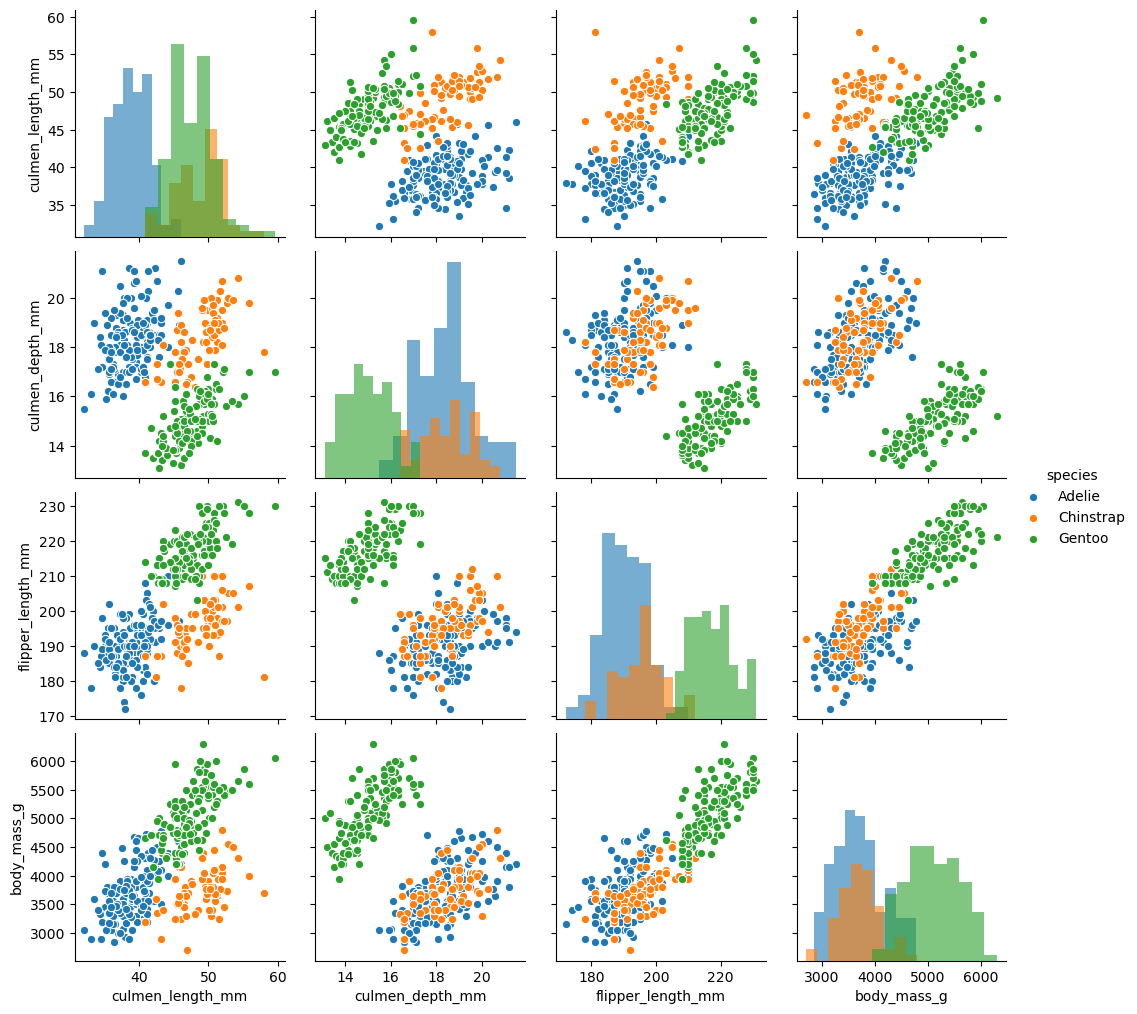

In [113]:
plt.style.use('default')
plt.figure(figsize=(16*.6, 9*.6))
pair_plot = sns.pairplot(data=data,
                         kind='scatter',
                         hue='species',
                         diag_kind='hist',
                         diag_kws={'alpha': .6})
plt.show()

### Wizualizacja dystrybucji wartości

Histogram, boxplot, violinplot, density plot

#### Histogram
<br></br>
<div style="text-align: justify">Histogram jest graficznym sposobem prezentacji danych, uzywanym do badania jak wyglada rozkład jednej lub wiecej zmiennych ciagłych. W celu uzyskania histogramu w Matplotlib stosuje sie funkcję <b>matplotlib.pyplot.hist</b>. Gdy histogram pokazuje liczebnosci, a nie gestość prawdopodobienstwa, szerokosci przedziałów powinny byc równe.</div>

<div style="text-align: justify">Poniższa wizualizacja przedstawia dystrybucję zmiennej opisującej długość skrzydła pingwina, w tym przypadku bez podziału na kategorie. Zawiera ona histogram, na który nałożony poprzez funkcję <i>matplotlib.pyplot.plot</i> został wykres gęstości (density plot), a także, przy zastosowaniu funkcji <b>matplotlib.axes.Axes.text</b> oraz <i>matplotlib.pyplot.axvline</i> zostały zaznaczone kwantyle rzędów: 1/4, 1/2 i 3/4.</div>

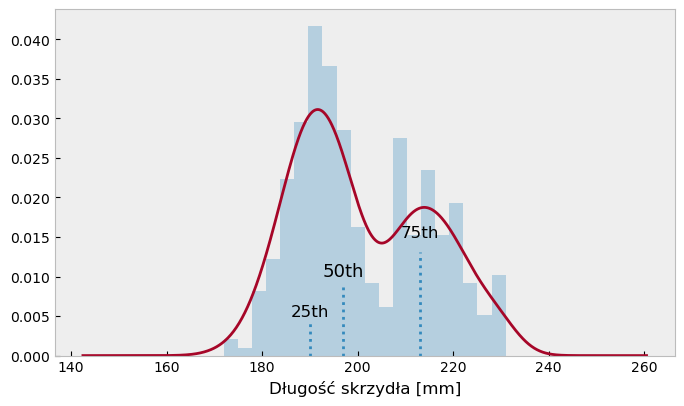

In [114]:
plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(16*.5, 9*.5))
dataset = data['flipper_length_mm']

ax = dataset.hist(bins=20,
                  alpha=0.3,
                  density=True,
                  histtype='bar',
                  rwidth=1)
# Parametry:
# bins - liczba "słupków" histogramu
# density - jeżeli ustawione jako "True", wartości na osi Y oznaczają gęstość (prawdopodobieństwo) występowania, 
#           w innym przypadku - wartość bezwględną
# histtype - typ histogramu: {'bar', 'barstacked', 'step', 'stepfilled'}
# rwidth - relatywna szerokość "słupków"

# Dodanie wykresu gęstości
ax = dataset.plot(kind='kde')

ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Długość skrzydła [mm]', fontsize=12)
ax.set_ylabel('')
ax.grid(axis='both')

# Wyznaczenie kwantyli
q_25 = dataset.quantile(0.25)
q_50 = dataset.quantile(0.5)
q_75 = dataset.quantile(0.75)
quants = [[q_25, 0.1], 
          [q_50, 0.2],  
          [q_75, 0.3]]

# Naniesienie wartości kwantyli na wykres
for q in quants:
    ax.axvline(q[0], 
               ymax = q[1], 
               linestyle = ":")
ax.text(q_25, quants[0][1] / 20, "25th", size = 12, horizontalalignment='center')
ax.text(q_50, quants[1][1] / 20, "50th", size = 13, horizontalalignment='center')
ax.text(q_75, quants[2][1] / 20, "75th", size = 12, horizontalalignment='center')

plt.show()
plt.style.use("default")

<div style="text-align: justify">Kolejna wizualizacja przy pomocy histogramów, tym razem przy użyciu czterech wykresów na jednym płótnie. Każda z przestrzeni wykresów zawiera informacje dotyczące innej zmiennej numerycznej z zestawu danych. Przedstawione dane zostały wyróżnione ze względu na kategorię - gatunek.</div>

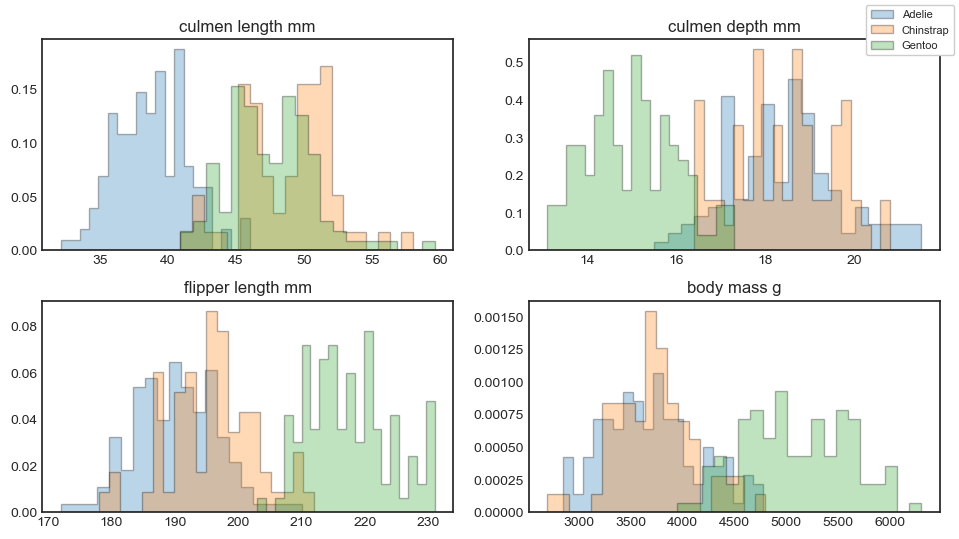

In [115]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         sharex=False, 
                         sharey=False, 
                         figsize=(16*.6, 9*.6))
axes = np.ravel(axes)

for index, ax in enumerate(['culmen_length_mm', 
                            'culmen_depth_mm',
                            'flipper_length_mm', 
                            'body_mass_g']):
    for hue in list(data.species.unique()):
        axes[index].hist(data[data.species == str(hue)][str(ax)], 
                         bins=20,
                         histtype='stepfilled',
                         density=True, 
                         alpha=.3, 
                         edgecolor="black")
    axes[index].set_title(str(ax).replace('_', ' '))

fig.legend(list(data.species.unique()), 
           fontsize=8, 
           frameon=True, 
           framealpha=1)
fig.tight_layout(h_pad=1, w_pad=2)
plt.show()
plt.style.use('default')

<div style="text-align: justify">Nieco inny wynik wizualizacji uzyskałem także stosując panele (Facets) z funkcji pakietu Seaborn - funkcja <i>seaborn.FacetGrid</i>, po czym mapując na nie wykresy histogramu narysowane funkcją <i>matplotlib.pyplot.hist</i>.</div>

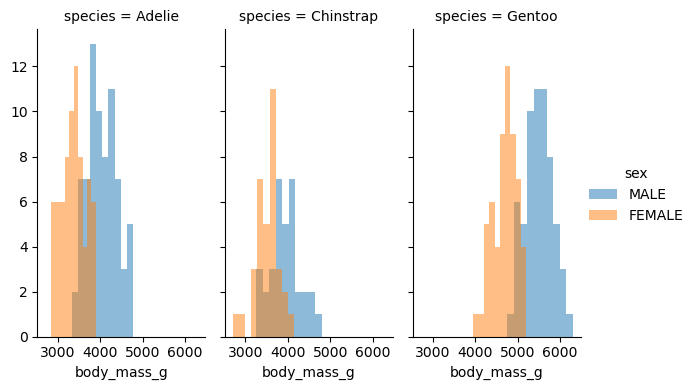

In [116]:
plt.style.use('default')
histogram = sns.FacetGrid(data, 
                          hue='sex', 
                          col='species',
                          height=4,
                          aspect=.5)
histogram = histogram.map(plt.hist, 
                          'body_mass_g', 
                          alpha=0.5,
                          bins=10).add_legend()
plt.show()

#### Wykres gęstości

In [117]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Wykres pudełkowy (box plot)

<div style="text-align: justify">Wykres pudełkowy na kompaktową wizualizację zmiennej ciągłej, dostarczając przy tym dodaktowych informacji statycznych: minimalną wartość, percentyl 25, medianę, percentyl 75 oraz maksymalną wartość, a także wartości odstające. By w sposób przystępny narysować bardziej zaawansowany wykres pudełkowy, można skorzystać z funkcji <b>seaborn.boxplot</b>.</div>

In [118]:
def draw_boxplot_sns(data, x, y, hue=None, show_mean=False, show_median=False):
    """ Funkcja rysująca wykres pudełkowy """
    
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(16*.6, 9*.6))
  
    ax = sns.boxplot(data=data, 
                     x=x, 
                     y=y,
                     linewidth=3,
                     hue=hue)
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize = 20)
    ax.set_ylabel(y.replace("_", " ").capitalize(), fontsize = 20)
    ax.tick_params(labelsize=15)
    
    if show_mean:
        ax.axvline(x=data[x].mean(),
                   linestyle="-",
                   linewidth=2,
                   alpha=.5,
                   color='b',
                   label='mean')
    if show_median:
        ax.axvline(x=data[x].median(),
                   linestyle="-",
                   linewidth=2,
                   alpha=.5,
                   color='r',
                   label='median')
    ax.xaxis.grid(True, 
                  which='major',
                  linestyle="--",
                  linewidth=1.5,
                  alpha=.6)
    ax.legend(loc='best', fontsize=12)

    plt.show()
    plt.style.use('default')

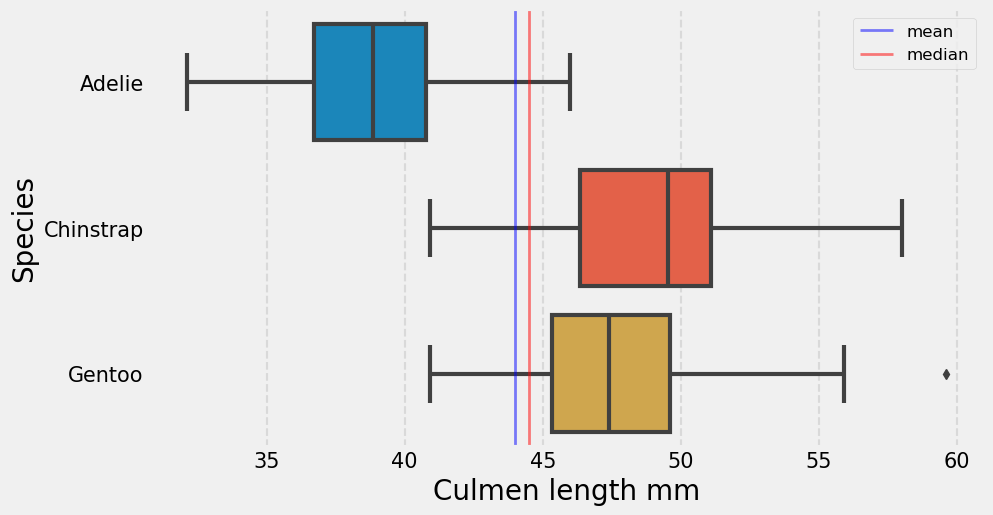

In [119]:
draw_boxplot_sns(data, 
                 x='culmen_length_mm', 
                 y='species', 
                 show_mean=True, 
                 show_median=True)

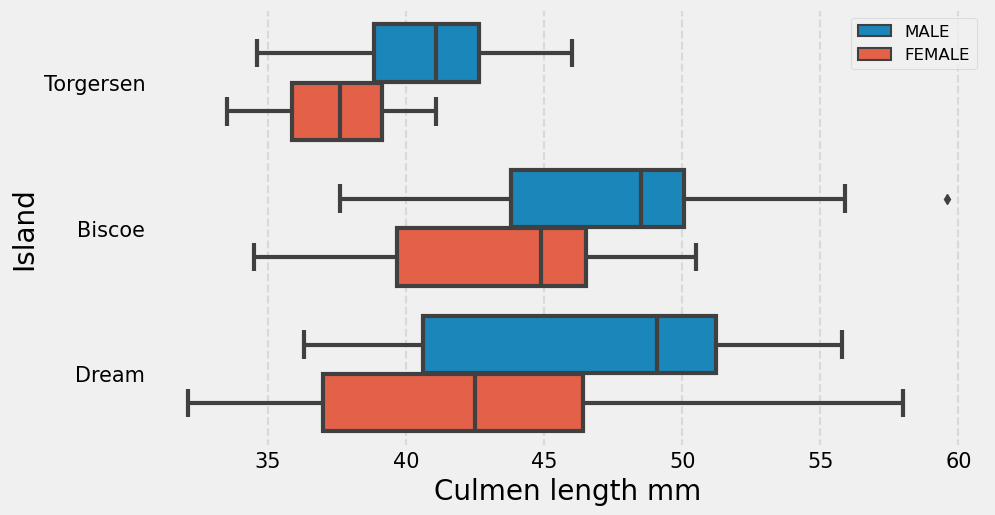

In [120]:
draw_boxplot_sns(data, 
                 x='culmen_length_mm', 
                 y='island', 
                 hue='sex')

#### Wykres skrzypcowy (Violin plot)

<div style="text-align: justify">Wykres skrzypcowy jest kolejnym sposobem na wizualizację zmiennej ciągłej. Zawiera on w sobie elementy wykresu pudełkowego oraz wykresu gęstości - jest to wykres gestosci z nałozonym efektem odbicia lustrzanego, rozmieszczony w podobny sposób jak wykres pudełkowy.</div>
<br></br>
<div style="text-align: justify">Pakiet Seaborn zawiera funkcję <b>seaborn.violinplot</b>, która umożliwia narysowanie wykresu skrzypcowego w bardzo przystępny sposób. Poniższą wizualizację wzbogaciłem o możliwość podziału danych na kategorie oraz nałożenia rozproszonych wartości.</div>

In [121]:
def draw_violinplot(data, x, y, hue=None, show_jitter=False):
    """ Funkcja rysująca wykres skrzypcowy """
    
    plt.style.use('ggplot')
    f, ax = plt.subplots(figsize=(16*.7, 9*.7))
    
    ax = sns.violinplot(data=data,
                        x=x,
                        y=y,
                        size=10,
                        hue=hue,
                        linewidth=2)
    if show_jitter:
        ax = sns.stripplot(x=x, 
                           y=y, 
                           data=data, 
                           jitter=0.1,
                           size=7,
                           linewidth=1,
                           hue=hue,
                           dodge=True,
                           alpha=.8)
    ax.grid(axis='y',
            linestyle='--',
            linewidth=1,
            alpha=.4,
            color='k')
    ax.set_xlabel(None)
    ax.set_ylabel(str(y).replace("_", " ").capitalize(), fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
    ax.legend(loc='best')
    
    plt.show()
    plt.style.use('default')

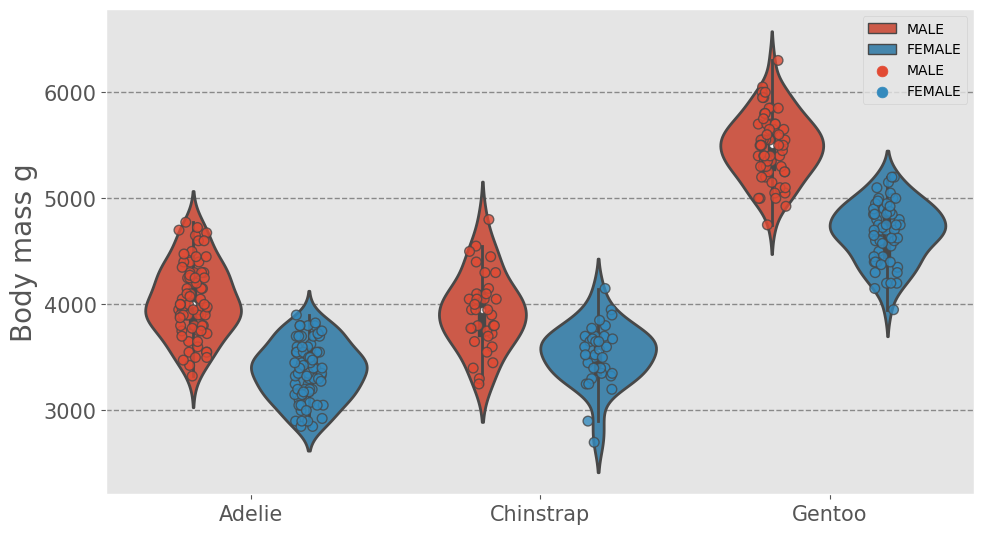

In [122]:
draw_violinplot(data=data, 
                x='species', 
                y='body_mass_g', 
                hue='sex',
                show_jitter=True)

### Tablica pomyłek (confusion matrix)

#### Trenowanie modelu
<br></br>
<div style="text-align: justify">W celu zaprezentowania kolejnych możliwości pakietów matplotlib oraz seaborn, dokonam wytrenowania modelu przy użyciu naiwnego klasyfikatora bayesowskiego oraz algorytmu SVC(Support Vector Classification).</div>

In [123]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_score = nb_model.score(x_test, y_test)
nb_pred = nb_model.predict(x_test)
print(f'Skuteczność zastosowanego modelu wynosi {nb_model.score(x_test, y_test)}')

Skuteczność zastosowanego modelu wynosi 0.9402985074626866


In [124]:
svm_model = SVC(C=1.0, kernel='rbf', probability=True)
svm_model.fit(x_train, y_train)
svm_score = svm_model.score(x_test, y_test)
svm_pred = svm_model.predict(x_test)
print(f'Skuteczność zastosowanego modelu wynosi {svm_model.score(x_test, y_test)}')

Skuteczność zastosowanego modelu wynosi 0.9701492537313433


#### Tablica pomyłek
<br></br>
<div style="text-align: justify">Tablica pomyłek (inaczej macierz błędów, ang. <i>confusion matrix</i>) jest stosowana przy ocenie jakości klasyfikacji. Jest to tabela pozwalająca na wizualizację jakości algorytmu uczenia nadzorowanego.</div>
<br></br>
<div style="text-align: justify">Wizualizacji tablicy pomyłek można dokonać, podobnie jak w przypadku wykresu korelacji, przy użyciu mapy cieplnej (mapy termicznej) - heatmap.</div>

In [125]:
def conf_matrix(cm, score, labels, colors='Blues'):
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(16*.6, 9*.6))

    cm = pd.DataFrame(cm)
    cm.columns = list(labels)
    cm.index = list(labels)
        
    ax = sns.heatmap(cm, 
                     annot=True,
                     annot_kws={'size': 14},
                     fmt="d", 
                     linewidths=.5,
                     linecolor='k',
                     square=True,
                     cmap=colors)
    ax.set_xlabel('Klasa predykowana', fontsize=14);
    ax.set_ylabel('Klasa rzeczywista', fontsize=14);
    ax.tick_params(labelsize=11)
    all_sample_title = f'Trafność klasyfikacji: {round(score, 5)}'
    ax.set_title(str(all_sample_title), size = 14)
    
    plt.show()

In [126]:
# Stworzenie tablic pomyłek dla obu predykcji
nb_cm = metrics.confusion_matrix(y_test, nb_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

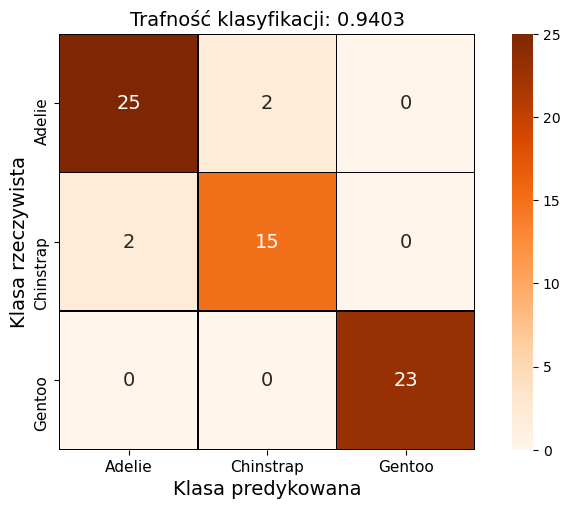

In [127]:
conf_matrix(cm=nb_cm, 
            score=nb_score, 
            labels=data.species.unique(), 
            colors='Oranges')

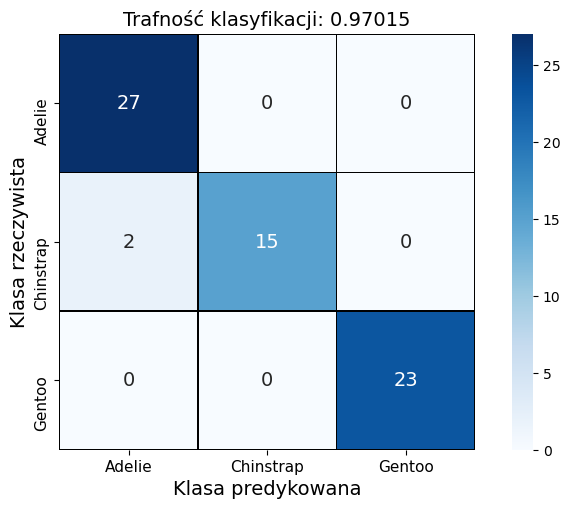

In [128]:
conf_matrix(cm=svm_cm, 
            score=svm_score, 
            labels=data.species.unique(), 
            colors='Blues')